<a href="https://colab.research.google.com/github/Harsha7021/Tier-1-CSGO-and-Faze-Clan/blob/main/CSGO_Faze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

players = pd.read_csv('players.csv')
players.head()


date player_name           team       opponent        country  \
0  2020-02-26      Brehze  Evil Geniuses         Liquid  United States   
1  2020-02-26        CeRq  Evil Geniuses         Liquid       Bulgaria   
2  2020-02-26       EliGE         Liquid  Evil Geniuses  United States   
3  2020-02-26       Ethan  Evil Geniuses         Liquid  United States   
4  2020-02-26         NAF         Liquid  Evil Geniuses         Canada   

   player_id  match_id  event_id         event_name  best_of  ...  \
0       9136   2339385      4901  IEM Katowice 2020        3  ...   
1      11219   2339385      4901  IEM Katowice 2020        3  ...   
2       8738   2339385      4901  IEM Katowice 2020        3  ...   
3      10671   2339385      4901  IEM Katowice 2020        3  ...   
4       8520   2339385      4901  IEM Katowice 2020        3  ...   

  m3_kddiff_ct m3_adr_ct m3_kast_ct  m3_rating_ct  m3_kills_t  m3_deaths_t  \
0         -1.0      72.5       80.0          0.93         7.0          9.0   
1          3.0      79.5       53.3          1.12         4.0          8.0   
2          1.0      81.5       63.6          1.03         9.0          9.0   
3          0.0      67.2       66.7          0.97         1.0          9.0   
4         -1.0      72.9       81.8          0.96         8.0          7.0   

   m3_kddiff_t  m3_adr_t  m3_kast_t  m3_rating_t  
0         -2.0      70.4       63.6         0.89  
1         -4.0      40.7       54.5         0.53  
2          0.0      87.9       73.3         1.05  
3         -8.0      14.8       45.5         0.31  
4          1.0      56.3       80.0         0.99  

[5 rows x 101 columns]

In [ ]:
import sqlite3

conn = sqlite3.connect('csgo.db')


In [ ]:
players.to_sql('players', conn, if_exists='replace', index=False)


383317

In [ ]:
economy = pd.read_csv('economy.csv')
economy.to_sql('economy', conn, if_exists='replace', index=False)

picks = pd.read_csv('picks.csv')
picks.to_sql('picks', conn, if_exists='replace', index=False)

results = pd.read_csv('results.csv')
results.to_sql('results', conn, if_exists='replace', index=False)


<ipython-input-5-363faae8a5c3>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  economy = pd.read_csv('economy.csv')


45773

In [ ]:
query = "SELECT player_name, kills, deaths FROM players ORDER BY kills DESC LIMIT 5"
top_players = pd.read_sql(query, conn)
top_players


player_name  kills  deaths
0       mertz    148     104
1      to1nou    148     114
2       BouLy    137     123
3    coldzera    130      92
4         XpG    129     118

In [ ]:
query = '''
SELECT player_name, AVG(rating) as avg_rating
FROM players
GROUP BY player_name
ORDER BY avg_rating DESC
LIMIT 10
'''
pd.read_sql(query, conn)


player_name  avg_rating
0     Quesakilla      2.0900
1  get_PAPERBOYd      1.8700
2        Ak HERO      1.7500
3         Tyrion      1.7100
4       Skorpion      1.7100
5            NwK      1.6625
6        ValcoNN      1.6550
7          Mux0r      1.6000
8    DecimatorZA      1.6000
9           kAAz      1.5900

In [ ]:
query = '''
SELECT player_name,
       AVG(kills_ct) AS avg_kills_ct,
       AVG(kills_t) AS avg_kills_t,
       AVG(rating_ct) AS avg_rating_ct,
       AVG(rating_t) AS avg_rating_t
FROM players
GROUP BY player_name
ORDER BY avg_rating_ct DESC
LIMIT 20
'''

df = pd.read_sql(query, conn)
df


player_name  avg_kills_ct  avg_kills_t  avg_rating_ct  avg_rating_t
0           MYR     24.000000     6.000000       2.260000      0.440000
1        Chr1Zz     17.000000    14.000000       2.130000      1.530000
2   CaptainZolo     19.000000     8.000000       2.030000      0.880000
3       Audisho     10.000000    15.000000       1.950000      1.450000
4          Mojo     10.000000    12.000000       1.913333      1.030000
5         mitiS      8.000000     6.000000       1.860000      0.620000
6        Br0die     25.000000     9.000000       1.780000      0.690000
7       Cryptic     44.000000    14.000000       1.750000      0.720000
8       SNAPPLE     12.000000    11.000000       1.740000      1.030000
9         revel      6.000000    12.000000       1.700000      1.520000
10        miksu     17.000000    17.000000       1.660000      1.620000
11           rz     36.000000    10.000000       1.650000      0.810000
12          ZIM     33.000000    10.000000       1.650000      1.250000
13       Harley     31.000000    22.000000       1.650000      1.000000
14       SENSEi     15.000000     6.000000       1.646667      0.543333
15        Sindi      6.000000    10.000000       1.640000      1.080000
16         souL     25.000000     9.000000       1.630000      0.630000
17         Germ     26.333333    13.333333       1.620000      0.560000
18       ZodiaX     24.000000    16.000000       1.610000      0.950000
19  bullet girl     22.000000    13.000000       1.600000      0.750000

In [ ]:
query = '''
SELECT player_name, AVG(m2_rating) AS avg_nuke_rating
FROM players
WHERE map_2 = 'Nuke'
GROUP BY player_name
ORDER BY avg_nuke_rating DESC
LIMIT 15
'''
df = pd.read_sql(query, conn)
df


player_name  avg_nuke_rating
0          Fog            2.540
1          ntk            2.190
2          lew            2.090
3       kickeh            1.990
4      LaffyTs            1.930
5         mada            1.920
6        grape            1.880
7      Turismo            1.875
8        BnTeT            1.870
9      KuckerZ            1.860
10     RequieM            1.830
11        wm4j            1.820
12       t4tty            1.820
13      tweiss            1.790
14       Porya            1.790

In [ ]:
query = '''
SELECT team, AVG(rating) AS avg_team_rating, AVG(adr) AS avg_team_adr
FROM players
GROUP BY team
ORDER BY avg_team_rating DESC
LIMIT 20
'''
df = pd.read_sql(query, conn)
df


team  avg_team_rating  avg_team_adr
0              Australia         1.762500    104.950000
1      Never Broke Again         1.626000     95.240000
2                   ICON         1.620000     97.700000
3              Antithese         1.614000     94.360000
4            ex-Epiphany         1.594000     94.600000
5         Virtual Impact         1.508000           NaN
6                    vRn         1.472000     90.000000
7              Nu Pogodi         1.452000     89.460000
8               Kitfoxes         1.438000     90.460000
9           OpTic Brasil         1.422000     86.520000
10  Bosnia & Herzegovina         1.419000     87.310000
11                   TCC         1.417333     87.320000
12                Titanz         1.410000     94.340000
13            C_gByX_Hor         1.406000     87.393333
14               IRONMEN         1.406000     89.346667
15               BTRG.HK         1.405000     87.410000
16         Sydney Saints         1.394000     88.400000
17            ALPENKINGZ         1.392000     88.726667
18           Xiphos ZeGg         1.392000     89.430000
19                ImbaTV         1.386000     88.320000

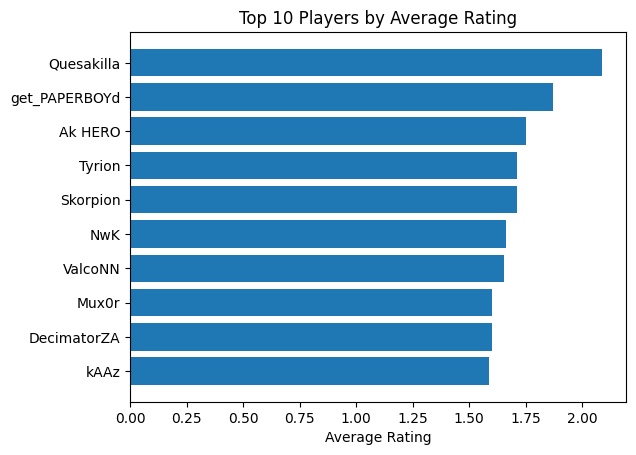

In [ ]:
import matplotlib.pyplot as plt

query = '''
SELECT player_name, AVG(rating) AS avg_rating
FROM players
GROUP BY player_name
ORDER BY avg_rating DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

plt.barh(df['player_name'], df['avg_rating'])
plt.xlabel('Average Rating')
plt.title('Top 10 Players by Average Rating')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
query = '''
SELECT player_name,
       AVG(m1_rating) AS avg_map1_rating,
       AVG(m2_rating) AS avg_map2_rating,
       AVG(m3_rating) AS avg_map3_rating
FROM players
GROUP BY player_name
ORDER BY avg_map1_rating DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


player_name  avg_map1_rating  avg_map2_rating  avg_map3_rating
0      thorogood             2.88             0.82             0.93
1    DecimatorZA             2.20             0.79              NaN
2     Quesakilla             2.09              NaN              NaN
3         NsDude             2.03             1.09              NaN
4       Tatikman             1.99             1.02             0.86
5        crAckEz             1.91             1.25              NaN
6          Mux0r             1.91             1.32              NaN
7       Ryan_old             1.89             0.45             0.93
8  get_PAPERBOYd             1.87              NaN              NaN
9          vKING             1.84             0.70             1.21

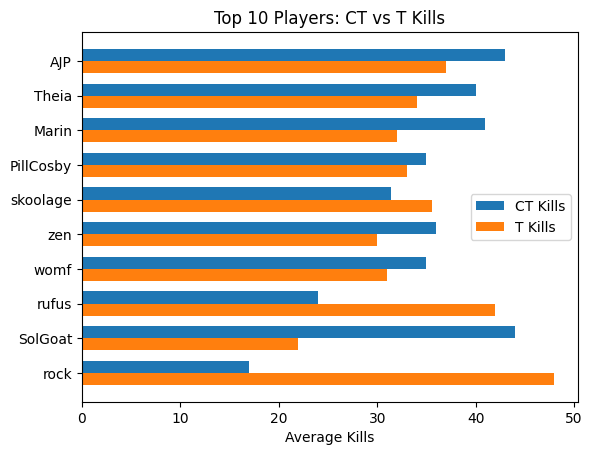

In [ ]:
query = '''
SELECT player_name,
       AVG(kills_ct) AS avg_kills_ct,
       AVG(kills_t) AS avg_kills_t
FROM players
GROUP BY player_name
ORDER BY (avg_kills_ct + avg_kills_t) DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt
import numpy as np

labels = df['player_name']
ct_kills = df['avg_kills_ct']
t_kills = df['avg_kills_t']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.barh(x - width/2, ct_kills, width, label='CT Kills')
ax.barh(x + width/2, t_kills, width, label='T Kills')

ax.set_xlabel('Average Kills')
ax.set_title('Top 10 Players: CT vs T Kills')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
plt.gca().invert_yaxis()
plt.show()


In [ ]:
query = '''
PRAGMA table_info(results)
'''
df = pd.read_sql(query, conn)
df


cid          name     type  notnull dflt_value  pk
0     0          date     TEXT        0       None   0
1     1        team_1     TEXT        0       None   0
2     2        team_2     TEXT        0       None   0
3     3          _map     TEXT        0       None   0
4     4      result_1  INTEGER        0       None   0
5     5      result_2  INTEGER        0       None   0
6     6    map_winner  INTEGER        0       None   0
7     7   starting_ct  INTEGER        0       None   0
8     8          ct_1  INTEGER        0       None   0
9     9           t_2  INTEGER        0       None   0
10   10           t_1  INTEGER        0       None   0
11   11          ct_2  INTEGER        0       None   0
12   12      event_id  INTEGER        0       None   0
13   13      match_id  INTEGER        0       None   0
14   14        rank_1  INTEGER        0       None   0
15   15        rank_2  INTEGER        0       None   0
16   16    map_wins_1  INTEGER        0       None   0
17   17    map_wins_2  INTEGER        0       None   0
18   18  match_winner  INTEGER        0       None   0

In [ ]:
query = 'PRAGMA table_info(results)'
pd.read_sql(query, conn)


cid          name     type  notnull dflt_value  pk
0     0          date     TEXT        0       None   0
1     1        team_1     TEXT        0       None   0
2     2        team_2     TEXT        0       None   0
3     3          _map     TEXT        0       None   0
4     4      result_1  INTEGER        0       None   0
5     5      result_2  INTEGER        0       None   0
6     6    map_winner  INTEGER        0       None   0
7     7   starting_ct  INTEGER        0       None   0
8     8          ct_1  INTEGER        0       None   0
9     9           t_2  INTEGER        0       None   0
10   10           t_1  INTEGER        0       None   0
11   11          ct_2  INTEGER        0       None   0
12   12      event_id  INTEGER        0       None   0
13   13      match_id  INTEGER        0       None   0
14   14        rank_1  INTEGER        0       None   0
15   15        rank_2  INTEGER        0       None   0
16   16    map_wins_1  INTEGER        0       None   0
17   17    map_wins_2  INTEGER        0       None   0
18   18  match_winner  INTEGER        0       None   0

In [ ]:
query = 'PRAGMA table_info(economy)'
pd.read_sql(query, conn)


cid       name     type  notnull dflt_value  pk
0     0       date     TEXT        0       None   0
1     1   match_id  INTEGER        0       None   0
2     2   event_id  INTEGER        0       None   0
3     3     team_1     TEXT        0       None   0
4     4     team_2     TEXT        0       None   0
..  ...        ...      ...      ...        ...  ..
94   94  26_winner     REAL        0       None   0
95   95  27_winner     REAL        0       None   0
96   96  28_winner     REAL        0       None   0
97   97  29_winner     REAL        0       None   0
98   98  30_winner     REAL        0       None   0

[99 rows x 6 columns]

In [ ]:
query = '''
SELECT _map AS map_name, match_winner, COUNT(*) AS win_count
FROM results
GROUP BY _map, match_winner
ORDER BY win_count DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


map_name  match_winner  win_count
0    Mirage             1       4804
1    Mirage             2       4217
2   Inferno             1       4022
3     Train             1       3551
4   Inferno             2       3463
5  Overpass             1       3016
6     Train             2       3015
7  Overpass             2       2609
8     Cache             1       2439
9      Nuke             1       2262

In [ ]:
query = '''
SELECT e.match_id, e.team_1, e.team_2, e."26_winner", e."27_winner", r.match_winner
FROM economy e
JOIN results r ON e.match_id = r.match_id
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


match_id         team_1         team_2  26_winner  27_winner  match_winner
0   2339402             G2  Natus Vincere        NaN        NaN             2
1   2339402             G2  Natus Vincere        NaN        NaN             2
2   2339402             G2  Natus Vincere        NaN        NaN             2
3   2339402             G2  Natus Vincere        1.0        2.0             2
4   2339402             G2  Natus Vincere        1.0        2.0             2
5   2339402             G2  Natus Vincere        1.0        2.0             2
6   2339402             G2  Natus Vincere        NaN        NaN             2
7   2339402             G2  Natus Vincere        NaN        NaN             2
8   2339402             G2  Natus Vincere        NaN        NaN             2
9   2339401  Natus Vincere       Astralis        NaN        NaN             1

In [ ]:
query = '''
SELECT event_id, team_1, team_2, COUNT(*) AS matches_played
FROM results
GROUP BY event_id, team_1, team_2
ORDER BY matches_played DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


event_id           team_1       team_2  matches_played
0      3133               SK   Virtus.pro               7
1      3309             FaZe       fnatic               7
2      4052          TeamOne       Mythic               7
3      5142          Phoenix        SKADE               7
4      1608              NiP       fnatic               6
5      2119  ALTERNATE aTTaX      Torpedo               6
6      2130       Luminosity           G2               6
7      2179             k1ck        gBots               6
8      2185              AGG      Epsilon               6
9      2200            TYLOO  VG.CyberZen               6

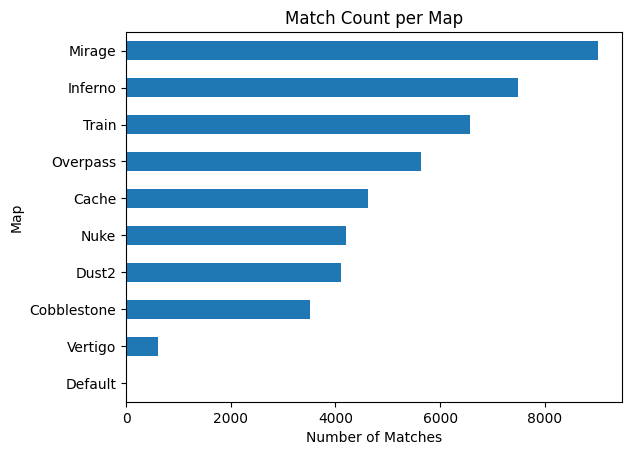

In [ ]:
query = '''
SELECT _map AS map_name, COUNT(*) AS match_count
FROM results
GROUP BY _map
ORDER BY match_count DESC
'''
df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt
df.plot(kind='barh', x='map_name', y='match_count', legend=False)
plt.xlabel('Number of Matches')
plt.ylabel('Map')
plt.title('Match Count per Map')
plt.gca().invert_yaxis()
plt.show()


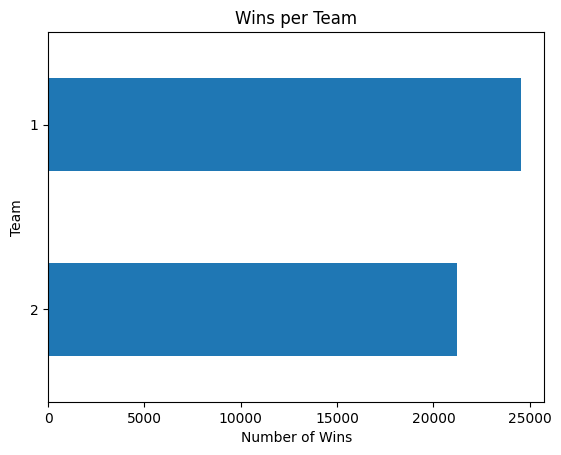

In [ ]:
query = '''
SELECT match_winner, COUNT(*) AS wins
FROM results
GROUP BY match_winner
ORDER BY wins DESC
'''
df = pd.read_sql(query, conn)

df.plot(kind='barh', x='match_winner', y='wins', legend=False)
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.title('Wins per Team')
plt.gca().invert_yaxis()
plt.show()


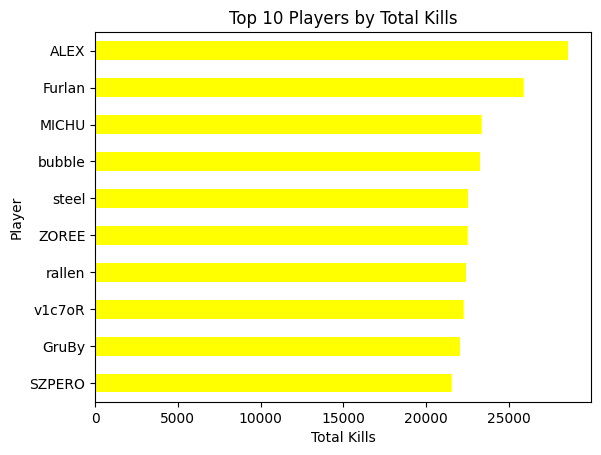

In [ ]:
query = '''
SELECT player_name, SUM(kills) AS total_kills
FROM players
GROUP BY player_name
ORDER BY total_kills DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

df.plot(kind='barh', x='player_name', y='total_kills', legend=False, color = 'yellow')
plt.xlabel('Total Kills')
plt.ylabel('Player')
plt.title('Top 10 Players by Total Kills')
plt.gca().invert_yaxis()
plt.show()


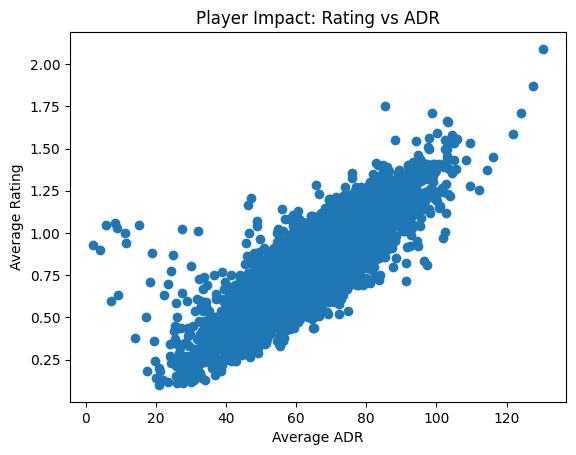

In [ ]:
query = '''
SELECT player_name, AVG(rating) AS avg_rating, AVG(adr) AS avg_adr
FROM players
GROUP BY player_name
'''
df = pd.read_sql(query, conn)

plt.scatter(df['avg_adr'], df['avg_rating'])
plt.xlabel('Average ADR')
plt.ylabel('Average Rating')
plt.title('Player Impact: Rating vs ADR')
plt.show()


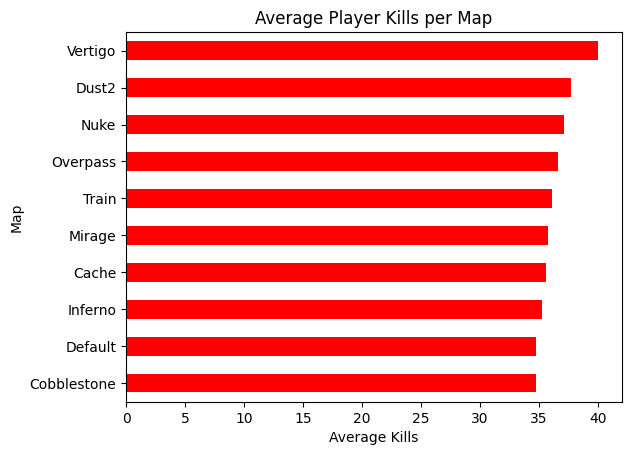

In [ ]:
query = '''
SELECT _map AS map_name, AVG(kills) AS avg_kills
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY map_name
ORDER BY avg_kills DESC
'''
df = pd.read_sql(query, conn)

df.plot(kind='barh', x='map_name', y='avg_kills', legend=False, color = 'red')
plt.xlabel('Average Kills')
plt.ylabel('Map')
plt.title('Average Player Kills per Map')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
query = '''
SELECT r._map AS map_name, p.team, AVG(p.adr) AS avg_team_adr
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r._map, p.team
ORDER BY avg_team_adr DESC
LIMIT 20
'''
df = pd.read_sql(query, conn)
df


map_name          team  avg_team_adr
0     Mirage   ex-Epiphany         99.02
1       Nuke         VeloX         97.80
2     Mirage          ICON         97.70
3      Cache    Atmosphere         97.08
4      Train  Org Incoming         96.04
5      Cache         NoTag         95.00
6      Train         NoTag         95.00
7      Dust2   cantwinalan         94.74
8      Train      Play4Lan         94.74
9   Overpass      GrayToad         93.74
10     Cache       fish123         93.64
11    Mirage          OTFS         93.62
12   Inferno  Down To Frag         92.58
13   Inferno       fish123         92.20
14      Nuke  SpeedRunners         91.88
15  Overpass     ex-Denial         91.66
16   Vertigo      Absolute         91.46
17     Train      CheckSix         91.28
18  Overpass         merry         91.20
19  Overpass        MAC-51         90.78

from matplotlib import pyplot as plt
df['avg_team_adr'].plot(kind='hist', bins=20, title='avg_team_adr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('map_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['avg_team_adr'].plot(kind='line', figsize=(8, 4), title='avg_team_adr')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['map_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='avg_team_adr', y='map_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

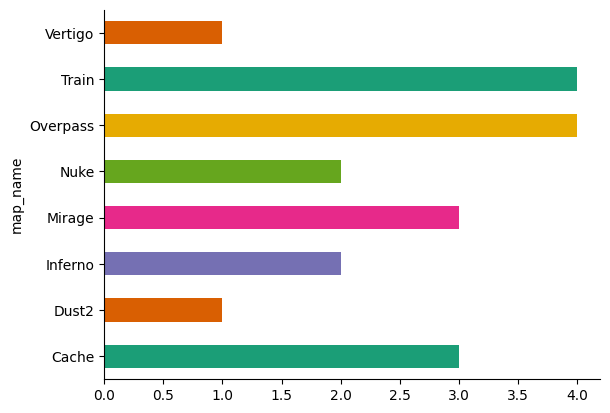

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('map_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
query = '''
SELECT p.team, COUNT(*) AS bo3_matches, AVG(p.rating) AS avg_team_rating
FROM players p
WHERE p.best_of = 3
GROUP BY p.team
ORDER BY avg_team_rating DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


team  bo3_matches  avg_team_rating
0             Antithese            5         1.614000
1           Xiphos ZeGg            5         1.490000
2             Nu Pogodi            5         1.452000
3               ExidiuM           10         1.421000
4  Bosnia & Herzegovina           10         1.419000
5                   TCC           15         1.417333
6                Groovy           15         1.417333
7            C_gByX_Hor           15         1.406000
8               IRONMEN           15         1.406000
9               BTRG.HK           10         1.405000

from matplotlib import pyplot as plt
df['bo3_matches'].plot(kind='hist', bins=20, title='bo3_matches')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['avg_team_rating'].plot(kind='hist', bins=20, title='avg_team_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bo3_matches', y='avg_team_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['bo3_matches'].plot(kind='line', figsize=(8, 4), title='bo3_matches')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['avg_team_rating'].plot(kind='line', figsize=(8, 4), title='avg_team_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
query = '''
SELECT player_name, AVG(rating) AS avg_rating,
       (MAX(rating) - MIN(rating)) AS rating_range
FROM players
GROUP BY player_name
ORDER BY rating_range ASC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


player_name  avg_rating  rating_range
0        None        0.89           0.0
1     $h0cK3r        0.64           0.0
2         -Ej        0.73           0.0
3       -Fish        1.02           0.0
4       -fLuX        0.74           0.0
5       -will        0.86           0.0
6        0I6I        1.11           0.0
7         0wl        0.66           0.0
8      100IAN        0.83           0.0
9         10X        0.78           0.0

In [ ]:
query = '''
SELECT player_name, SUM(kills - deaths) AS total_kd_diff
FROM players
GROUP BY player_name
ORDER BY total_kd_diff DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


player_name  total_kd_diff
0    coldzera           5030
1      s1mple           4664
2      device           4058
3    XANTARES           3727
4       ZywOo           3635
5       BnTeT           3511
6        NiKo           3367
7     huNter-           3308
8      kennyS           3238
9        Jame           3235

In [ ]:
query = '''
SELECT _map,
       SUM(CASE WHEN map_winner = 1 THEN 1 ELSE 0 END) AS ct_wins,
       SUM(CASE WHEN map_winner = 2 THEN 1 ELSE 0 END) AS t_wins
FROM results
GROUP BY _map
ORDER BY ct_wins DESC
'''
df = pd.read_sql(query, conn)
df


_map  ct_wins  t_wins
0       Mirage     4827    4194
1      Inferno     4043    3442
2        Train     3598    2968
3     Overpass     3003    2622
4        Cache     2496    2117
5         Nuke     2246    1960
6        Dust2     2194    1920
7  Cobblestone     1847    1666
8      Vertigo      334     275
9      Default       16       5

from matplotlib import pyplot as plt
df['ct_wins'].plot(kind='hist', bins=20, title='ct_wins')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['t_wins'].plot(kind='hist', bins=20, title='t_wins')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ct_wins', y='t_wins', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['ct_wins'].plot(kind='line', figsize=(8, 4), title='ct_wins')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['t_wins'].plot(kind='line', figsize=(8, 4), title='t_wins')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
query = '''
SELECT event_name, AVG(rating) AS avg_event_rating
FROM players
GROUP BY event_name
ORDER BY avg_event_rating DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


event_name  avg_event_rating
0         World Championships 2016 Oceanic Qualifier          1.292500
1               EPICENTER: Moscow CIS Open Qualifier          1.111000
2                          5K Maximum Level Season 1          1.101071
3                     SP Gaming Tournament #6 Finals          1.101000
4  ESL Australia & NZ Championship Season 8 Quali...          1.097000
5                      Tiger Masters Season 3 Finals          1.096000
6                   ESEA MDL Season 23 Europe Finals          1.095000
7                            Copa Brasil 2017 Finals          1.094000
8     WESG 2018 Mexico & Central America Qualifier 2          1.093000
9                                 GamesNet.cl League          1.092000

from matplotlib import pyplot as plt
df['avg_event_rating'].plot(kind='hist', bins=20, title='avg_event_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['avg_event_rating'].plot(kind='line', figsize=(8, 4), title='avg_event_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

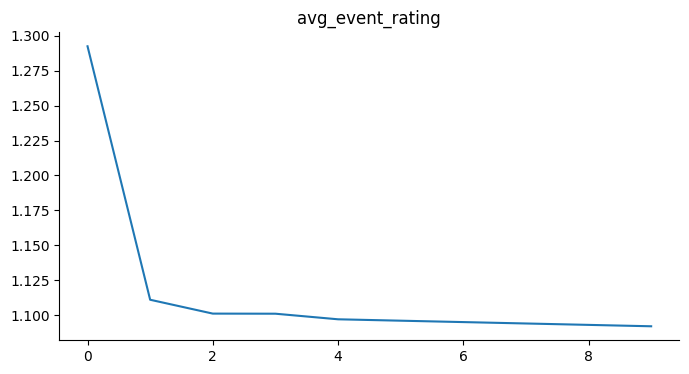

In [ ]:
from matplotlib import pyplot as plt
df['avg_event_rating'].plot(kind='line', figsize=(8, 4), title='avg_event_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
query = '''
SELECT _map, player_name, AVG(rating) AS avg_rating
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY _map, player_name
ORDER BY avg_rating DESC
LIMIT 20
'''
df = pd.read_sql(query, conn)
df


_map player_name  avg_rating
0      Overpass         c2h    2.390000
1        Mirage        sktr    2.240000
2      Overpass     st1cker    2.060000
3         Dust2     lehazor    2.040000
4      Overpass       Anima    2.000000
5         Train       BEARD    1.990000
6       Default         nex    1.890000
7         Dust2      keznit    1.880000
8         Dust2        H4wK    1.810000
9          Nuke       SIDOF    1.810000
10        Cache        cath    1.790000
11       Mirage      Chr1Zz    1.790000
12  Cobblestone      astaRR    1.786667
13  Cobblestone        hOru    1.780000
14  Cobblestone      fisheR    1.770000
15       Mirage         Gsp    1.760000
16         Nuke        TONI    1.750000
17     Overpass      zorboT    1.740000
18      Vertigo         Laz    1.735000
19  Cobblestone    skoolage    1.730000

In [ ]:
query = '''
SELECT event_name, player_name, AVG(rating) AS avg_rating
FROM players
GROUP BY event_name, player_name
HAVING COUNT(*) > 3
ORDER BY avg_rating DESC
LIMIT 20
'''
df = pd.read_sql(query, conn)
df


event_name player_name  avg_rating
0                Copenhagen Games 2016 BYOC Qualifier    XANTARES      1.9300
1                             King of Nordic Season 5        zehN      1.8600
2                Copenhagen Games 2016 BYOC Qualifier      jayzaR      1.8575
3                                     Headshot Cup #4      frozen      1.8440
4                       WESG 2019 Central Asia Finals        Jame      1.8250
5                                 QuickShot Arena #15    XANTARES      1.8075
6                  ESL Brazil Premier League Season 7         vsm      1.7900
7                          DreamHack Open Denver 2017    Stewie2K      1.7825
8                Copenhagen Games 2016 BYOC Qualifier       DESPE      1.7800
9                Copenhagen Games 2017 BYOC Qualifier      cadiaN      1.7725
10                      eXTREMESLAND 2017 Asia Finals        Sico      1.7425
11                              ESL One New York 2017        rain      1.7375
12               Esports Arena Showdown Championship         HEN1      1.7275
13               IeSF 2017 Australia Closed Qualifier       malta      1.7275
14     WESG 2016 Africa & Middle East Regional Finals    XANTARES      1.7220
15                              ESL One New York 2017        NiKo      1.7200
16         IEM Sydney 2019 East Asia Closed Qualifier        xeta      1.7100
17                   ESEA MDL Season 32 North America        dapr      1.7020
18  ZEN Esports Network League Season 1 ANZ Open Q...   dizzyLife      1.7000
19                           Cross Border Esport 2017       stavn      1.6950

In [ ]:
query = '''
SELECT player_name, AVG(kast) AS avg_kast
FROM players
GROUP BY player_name
ORDER BY avg_kast DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


player_name  avg_kast
0         BrianD     100.0
1        Ak HERO     100.0
2          iksou      98.3
3     nirvana_sf      96.7
4            peu      95.7
5         JMaldo      95.2
6  get_PAPERBOYd      95.0
7          xVlaD      93.1
8        AkiraSZ      92.9
9             dz      92.7

In [ ]:
query = '''
SELECT player_name, AVG(flash_assists) AS avg_flash_assists
FROM players
GROUP BY player_name
ORDER BY avg_flash_assists DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


player_name  avg_flash_assists
0         ELQEW          12.000000
1          Simu           9.000000
2        KKoKKo           9.000000
3        dannyK           8.000000
4          NOtA           8.000000
5       Lowlita           8.000000
6  Intervention           8.000000
7        DIVINE           8.000000
8       ChrisWa           8.000000
9           b2k           7.333333

In [ ]:
query = '''
SELECT player_name, SUM(hs)*1.0 / SUM(kills) AS hs_percentage
FROM players
WHERE kills > 50
GROUP BY player_name
ORDER BY hs_percentage DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
df


player_name  hs_percentage
0      dekseN       0.844828
1       ULTRA       0.747664
2        yAmi       0.732143
3        tom1       0.727273
4        razz       0.719298
5       Goose       0.709091
6       BOROS       0.703448
7     Matzera       0.698276
8         B1T       0.696697
9     Biuckmt       0.690909

from matplotlib import pyplot as plt
_df_0['hs_percentage'].plot(kind='hist', bins=20, title='hs_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hs_percentage'].plot(kind='line', figsize=(8, 4), title='hs_percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

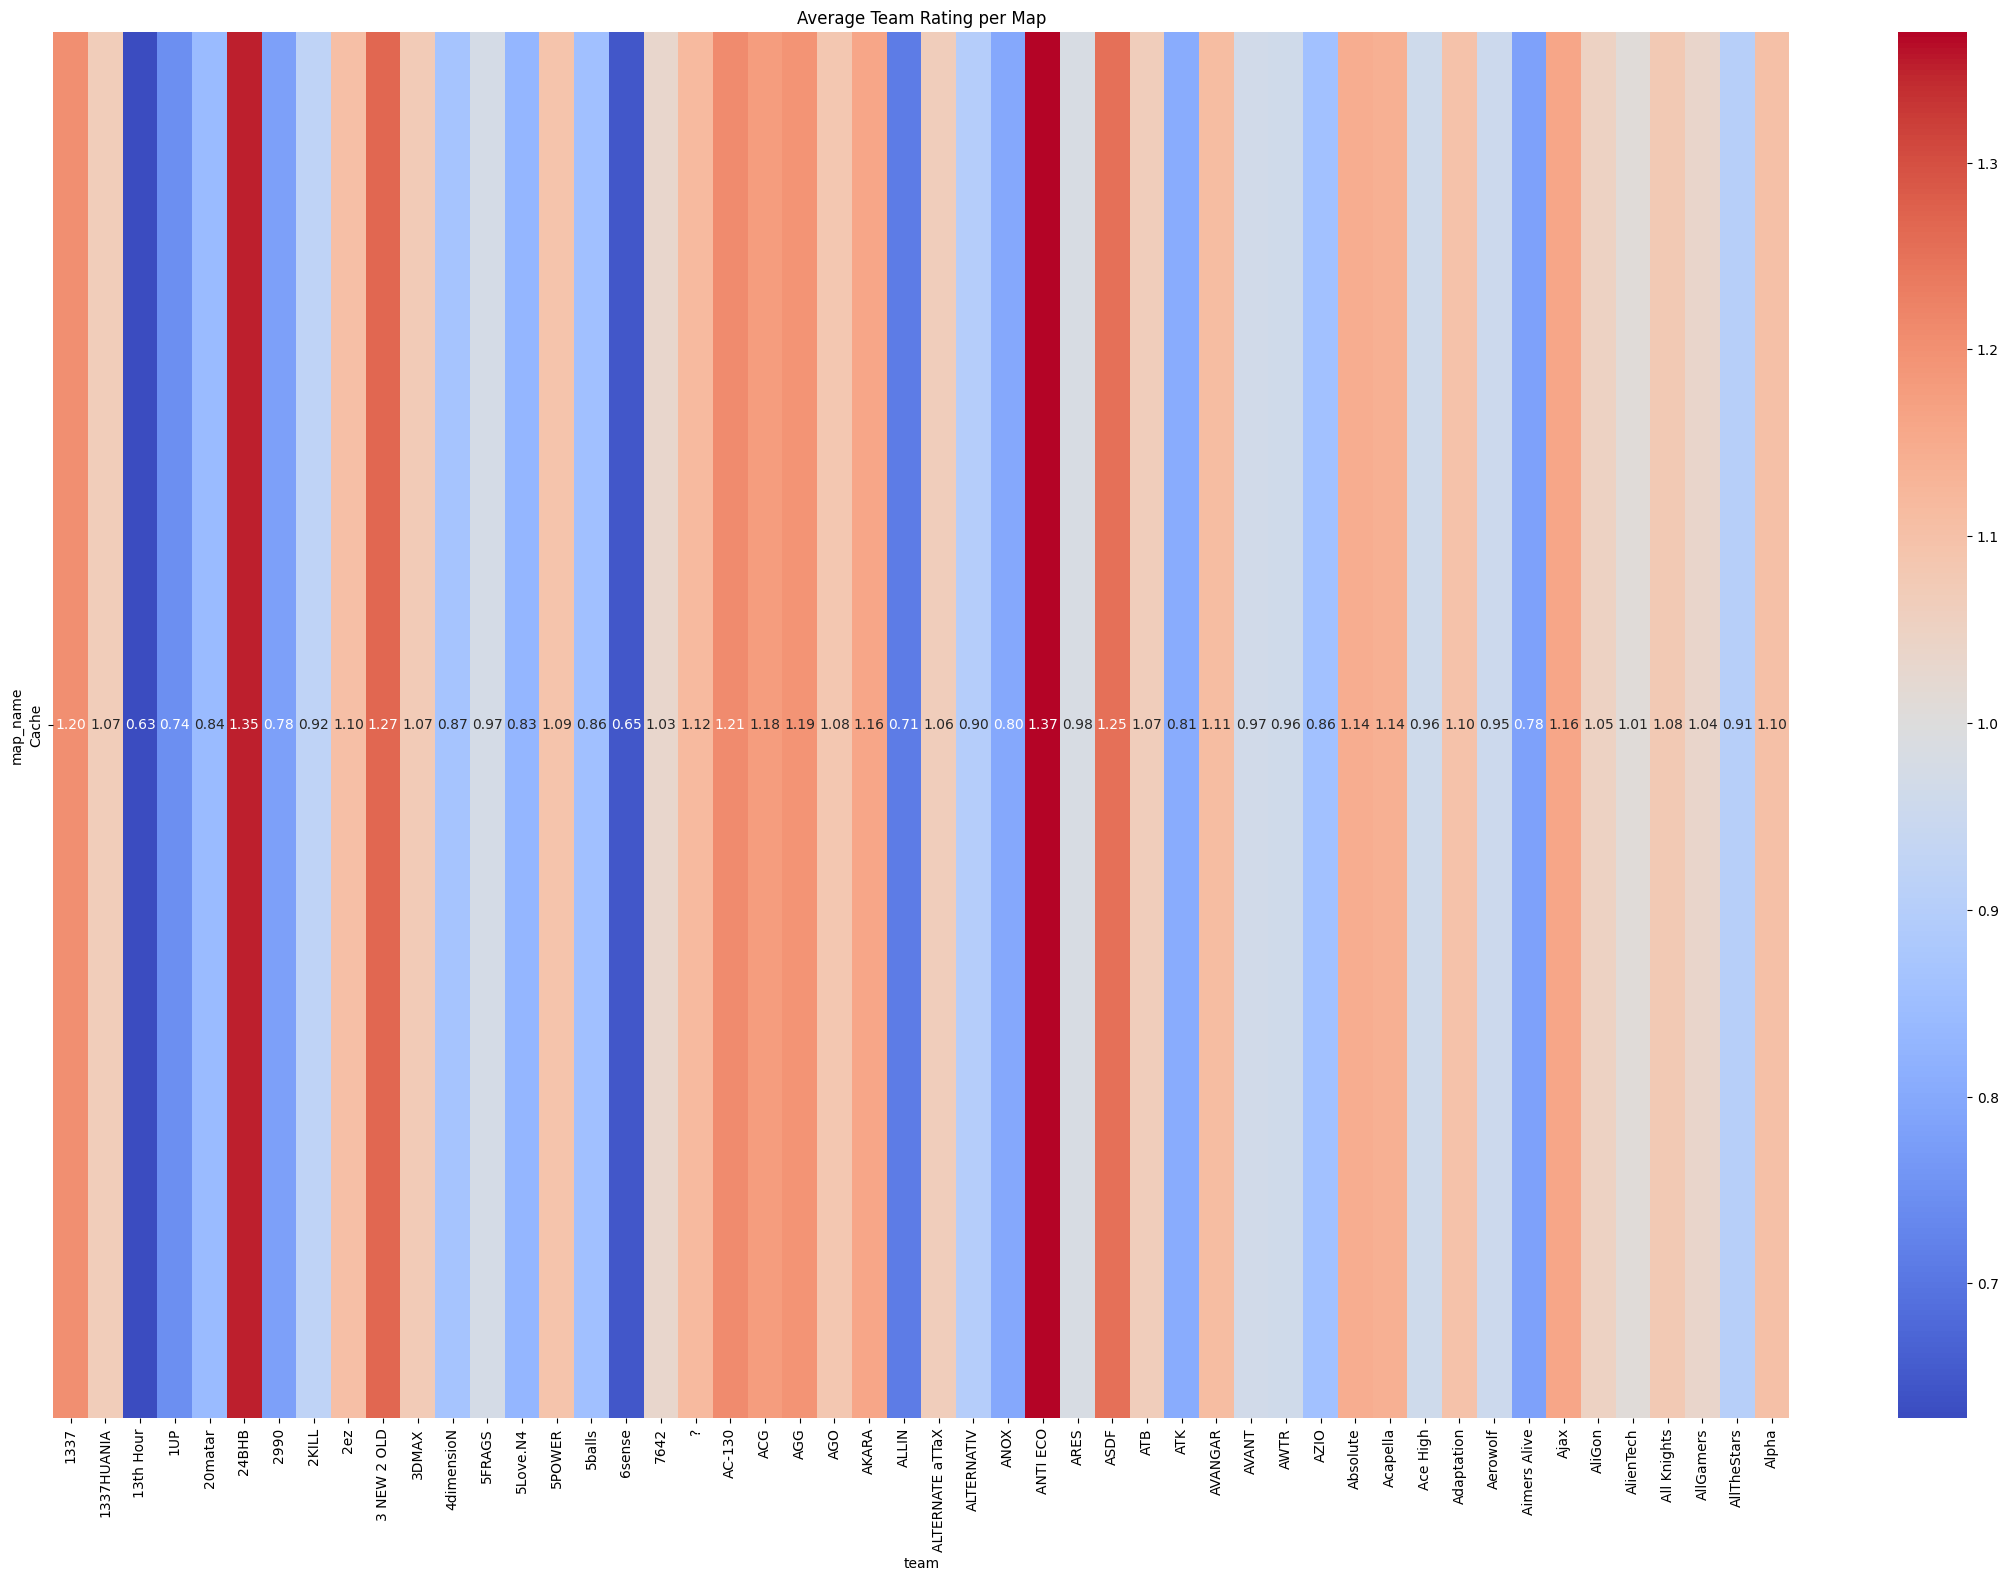

In [ ]:
query = '''
SELECT r._map AS map_name, p.team, AVG(p.rating) AS avg_rating
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r._map, p.team
limit 50
'''
df = pd.read_sql(query, conn)
pivot = df.pivot(index='map_name', columns='team', values='avg_rating')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28,18))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Team Rating per Map')
plt.show()


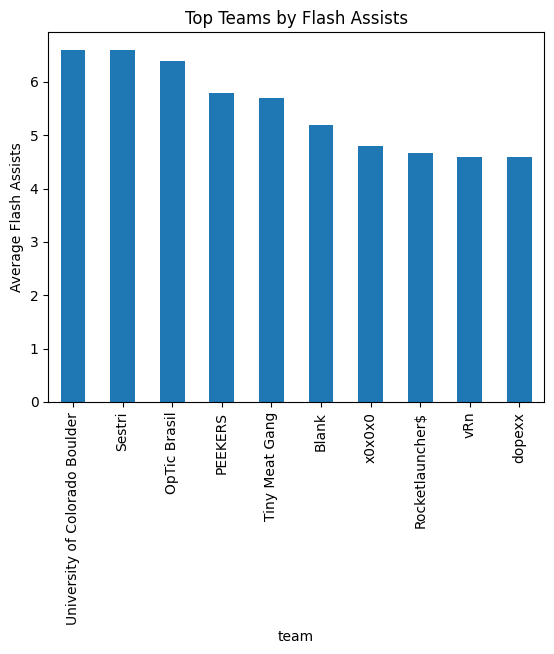

In [ ]:
query = '''
SELECT team, AVG(flash_assists) AS avg_flash_assists
FROM players
GROUP BY team
ORDER BY avg_flash_assists DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

df.plot(kind='bar', x='team', y='avg_flash_assists', legend=False)
plt.ylabel('Average Flash Assists')
plt.title('Top Teams by Flash Assists')
plt.show()


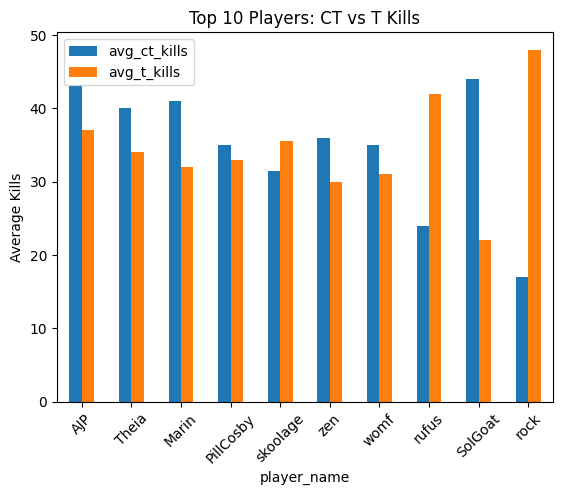

In [ ]:
query = '''
SELECT player_name, AVG(kills_ct) AS avg_ct_kills, AVG(kills_t) AS avg_t_kills
FROM players
GROUP BY player_name
ORDER BY (avg_ct_kills + avg_t_kills) DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

df.plot(x='player_name', y=['avg_ct_kills', 'avg_t_kills'], kind='bar')
plt.ylabel('Average Kills')
plt.title('Top 10 Players: CT vs T Kills')
plt.xticks(rotation=45)
plt.show()


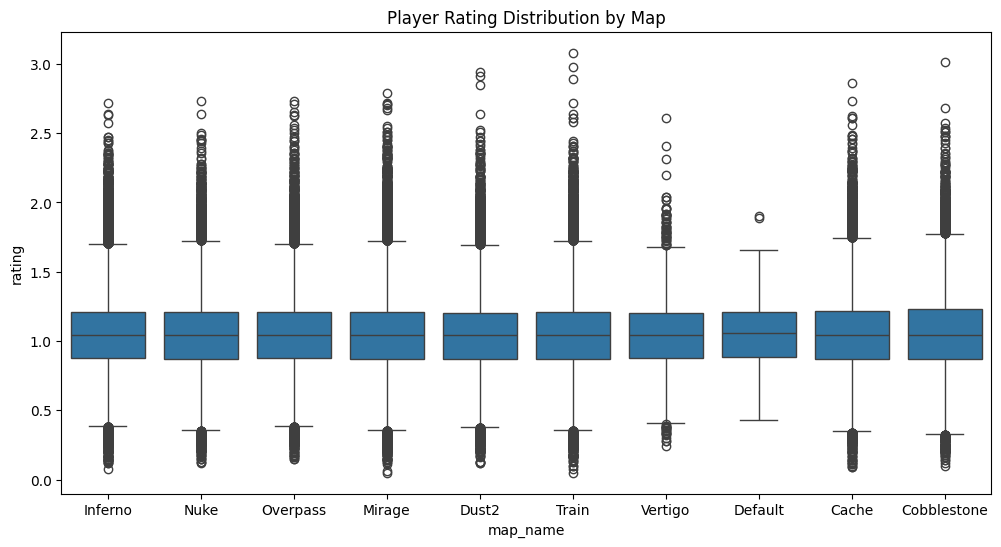

In [ ]:
query = '''
SELECT r._map AS map_name, p.rating
FROM players p
JOIN results r ON p.match_id = r.match_id
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='map_name', y='rating')
plt.title('Player Rating Distribution by Map')
plt.show()


<ipython-input-65-7e1b02899616>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='total_kills', y='player_name', palette='viridis')


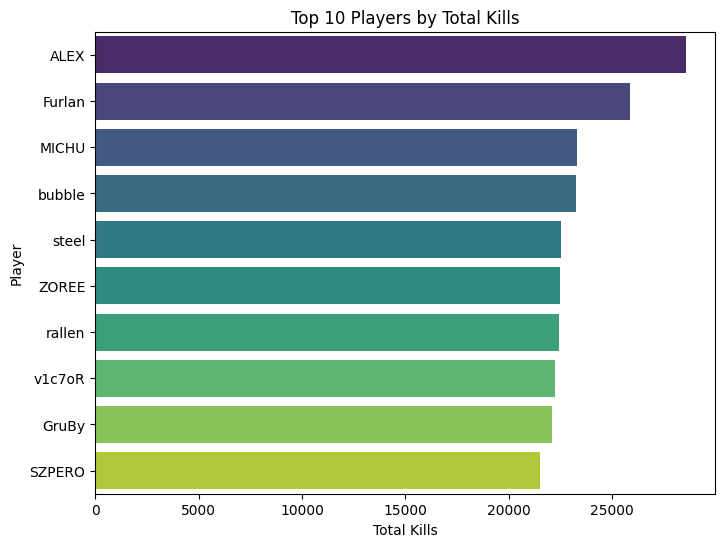

In [ ]:
query = '''
SELECT player_name, SUM(kills) AS total_kills
FROM players
GROUP BY player_name
ORDER BY total_kills DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='total_kills', y='player_name', palette='viridis')
plt.title('Top 10 Players by Total Kills')
plt.xlabel('Total Kills')
plt.ylabel('Player')
plt.show()


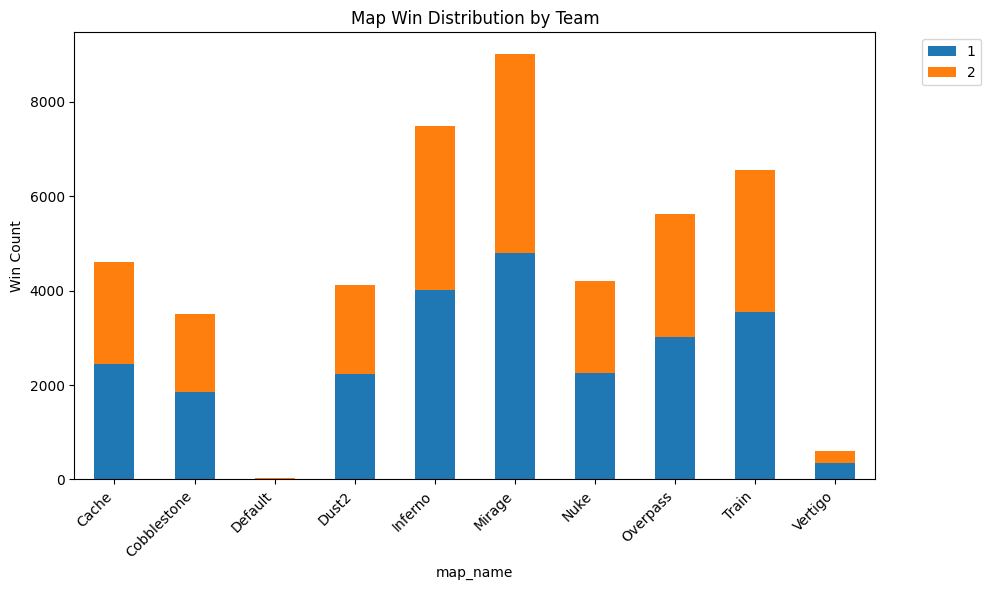

In [ ]:
query = '''
SELECT _map AS map_name, match_winner, COUNT(*) AS win_count
FROM results
GROUP BY map_name, match_winner
'''
df = pd.read_sql(query, conn)

pivot = df.pivot(index='map_name', columns='match_winner', values='win_count').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Win Count')
plt.title('Map Win Distribution by Team')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


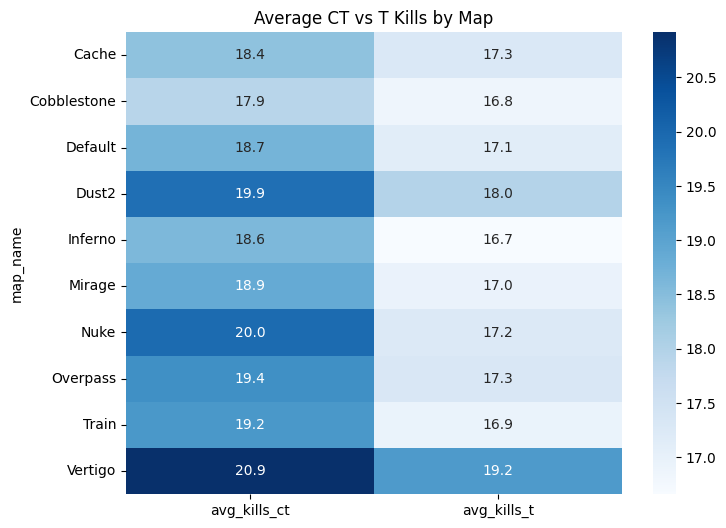

In [ ]:
query = '''
SELECT r._map AS map_name, AVG(p.kills_ct) AS avg_kills_ct, AVG(p.kills_t) AS avg_kills_t
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r._map
'''
df = pd.read_sql(query, conn)

pivot = df.set_index('map_name')[['avg_kills_ct', 'avg_kills_t']]

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title('Average CT vs T Kills by Map')
plt.show()


<ipython-input-70-427d6b69ccae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='kd_ratio', y='player_name', palette='magma')


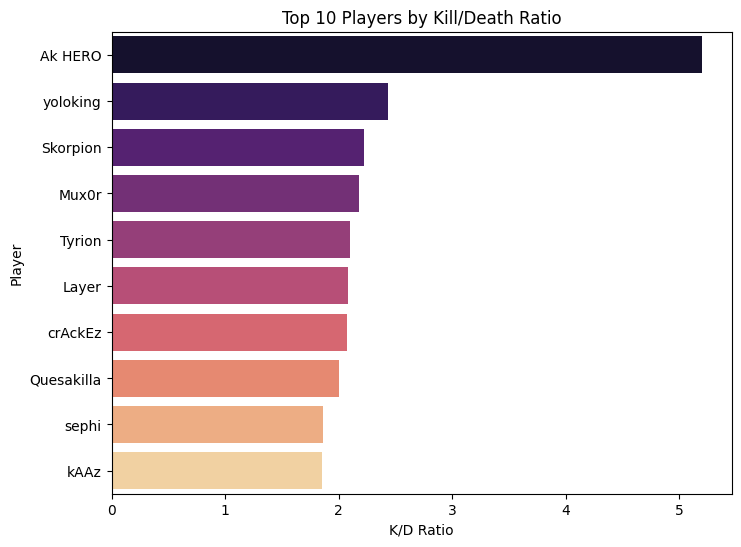

In [ ]:
query = '''
SELECT player_name, SUM(kills)*1.0 / SUM(deaths) AS kd_ratio
FROM players
WHERE deaths > 0
GROUP BY player_name
ORDER BY kd_ratio DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='kd_ratio', y='player_name', palette='magma')
plt.title('Top 10 Players by Kill/Death Ratio')
plt.xlabel('K/D Ratio')
plt.ylabel('Player')
plt.show()


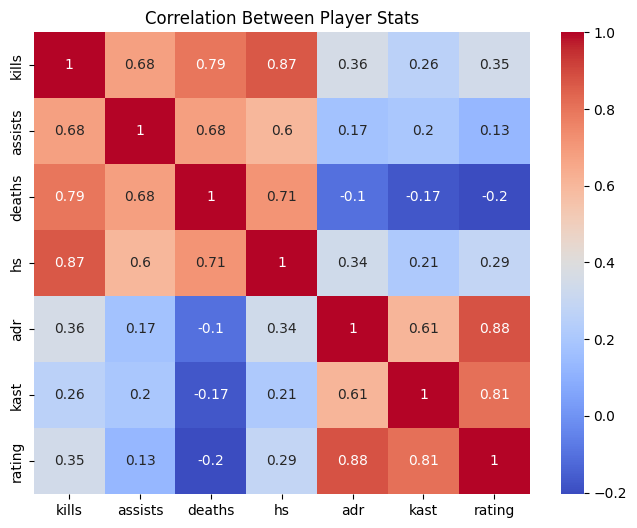

In [ ]:
query = '''
SELECT kills, assists, deaths, hs, adr, kast, rating
FROM players
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Player Stats')
plt.show()


<ipython-input-72-8148db853f86>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='hs_percentage', y='team', palette='crest')


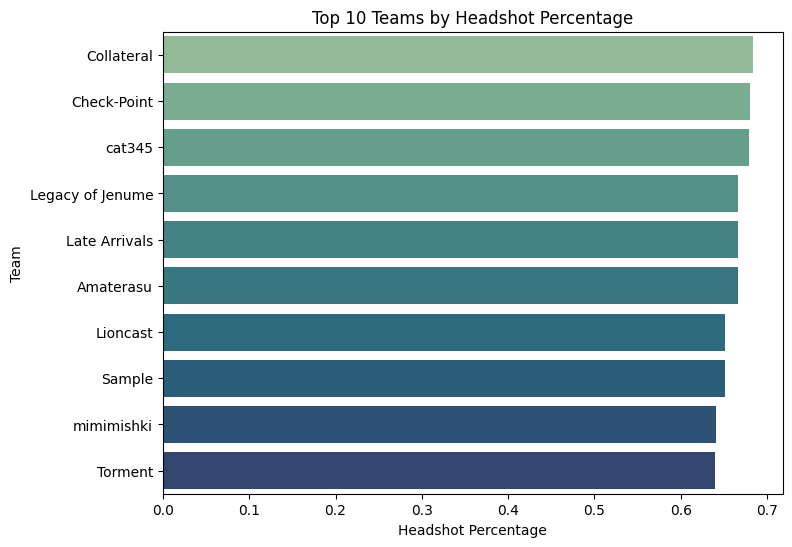

In [ ]:
query = '''
SELECT team, SUM(hs)*1.0 / SUM(kills) AS hs_percentage
FROM players
WHERE kills > 0
GROUP BY team
ORDER BY hs_percentage DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='hs_percentage', y='team', palette='crest')
plt.title('Top 10 Teams by Headshot Percentage')
plt.xlabel('Headshot Percentage')
plt.ylabel('Team')
plt.show()


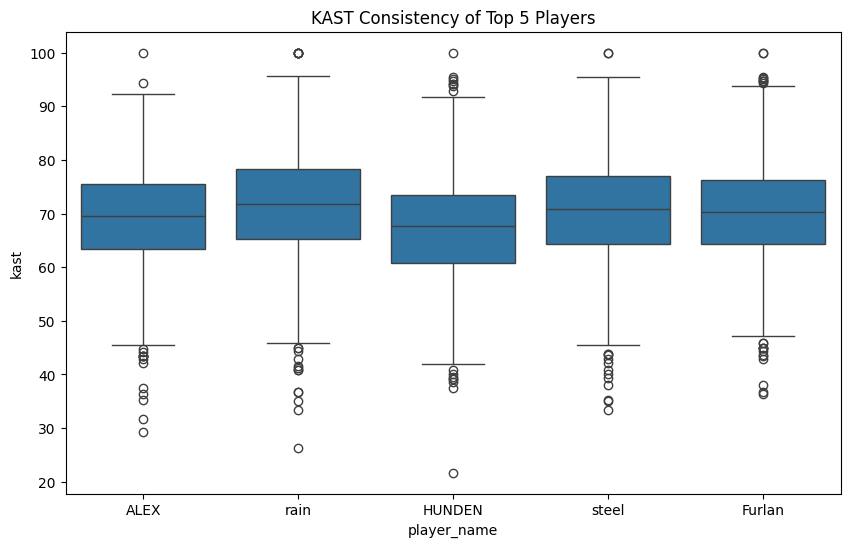

In [ ]:
query = '''
SELECT player_name, kast
FROM players
'''
df = pd.read_sql(query, conn)

top_players = df['player_name'].value_counts().head(5).index
df_top = df[df['player_name'].isin(top_players)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_top, x='player_name', y='kast')
plt.title('KAST Consistency of Top 5 Players')
plt.show()


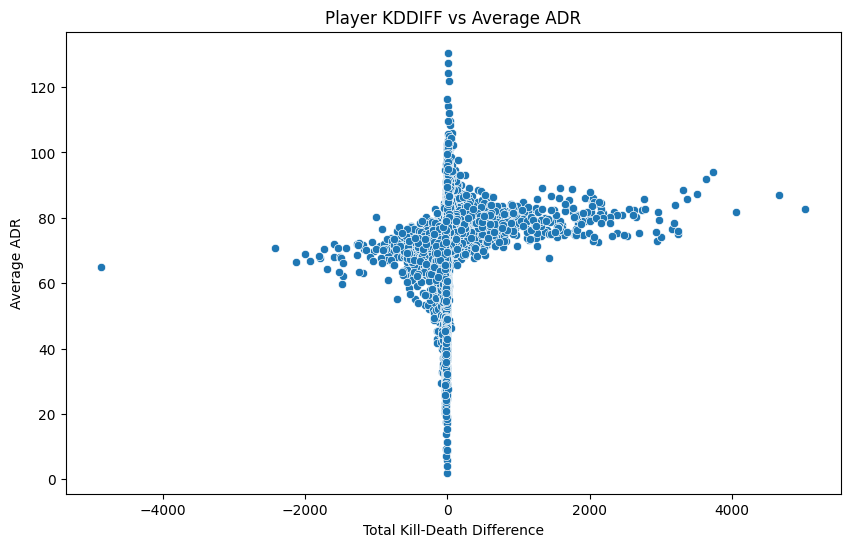

In [ ]:
query = '''
SELECT player_name, SUM(kills - deaths) AS total_kddiff, AVG(adr) AS avg_adr
FROM players
GROUP BY player_name
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_kddiff', y='avg_adr')
plt.title('Player KDDIFF vs Average ADR')
plt.xlabel('Total Kill-Death Difference')
plt.ylabel('Average ADR')
plt.show()


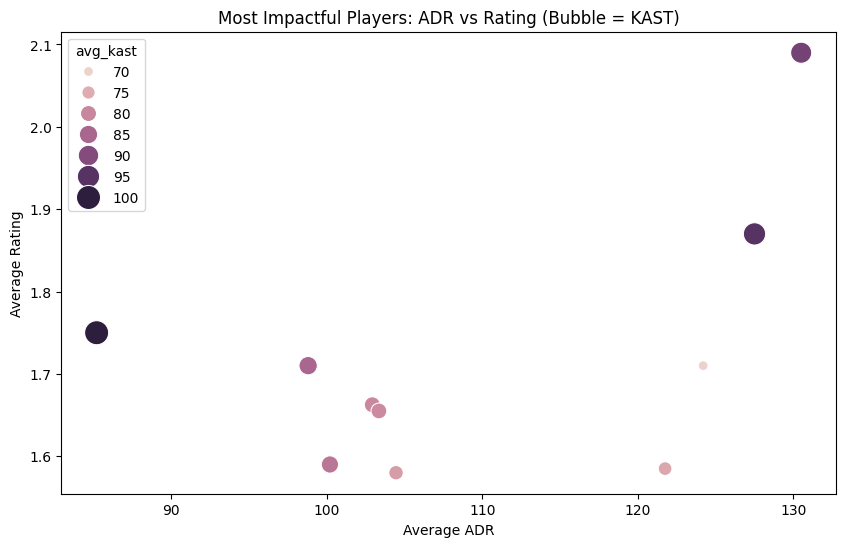

In [ ]:
query = '''
SELECT player_name, AVG(rating) AS avg_rating, AVG(kast) AS avg_kast, AVG(adr) AS avg_adr
FROM players
GROUP BY player_name
HAVING AVG(kast) > 60 AND AVG(adr) > 70
ORDER BY avg_rating DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_adr', y='avg_rating', size='avg_kast', hue='avg_kast', legend='brief', sizes=(50, 300))
plt.title('Most Impactful Players: ADR vs Rating (Bubble = KAST)')
plt.xlabel('Average ADR')
plt.ylabel('Average Rating')
plt.show()


<ipython-input-79-72b1a3db2c7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='clutch_kddiff', y='player_name', palette='rocket')


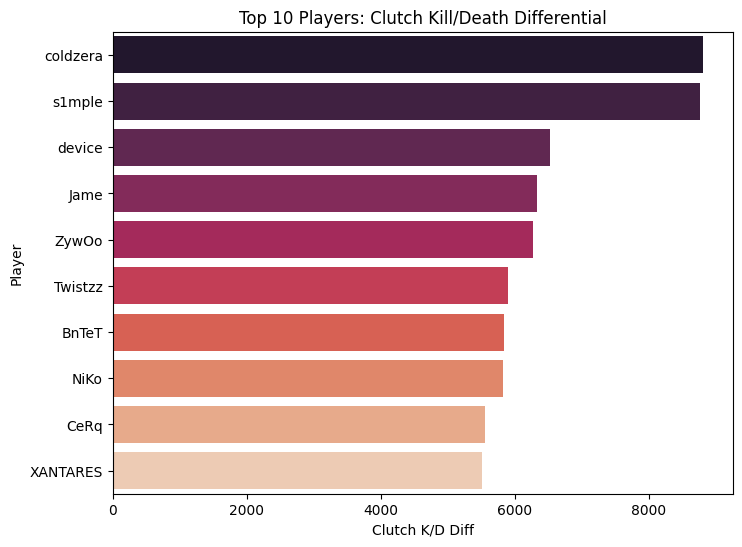

In [ ]:
query = '''
SELECT player_name, SUM(kills - deaths) AS clutch_kddiff
FROM players p
JOIN results r ON p.match_id = r.match_id
WHERE p.team != r.match_winner
GROUP BY player_name
ORDER BY clutch_kddiff DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='clutch_kddiff', y='player_name', palette='rocket')
plt.title('Top 10 Players: Clutch Kill/Death Differential')
plt.xlabel('Clutch K/D Diff')
plt.ylabel('Player')
plt.show()


<ipython-input-80-2a5cc3f7367e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='total_fkdiff', y='player_name', palette='ch:s=.25,rot=-.25')


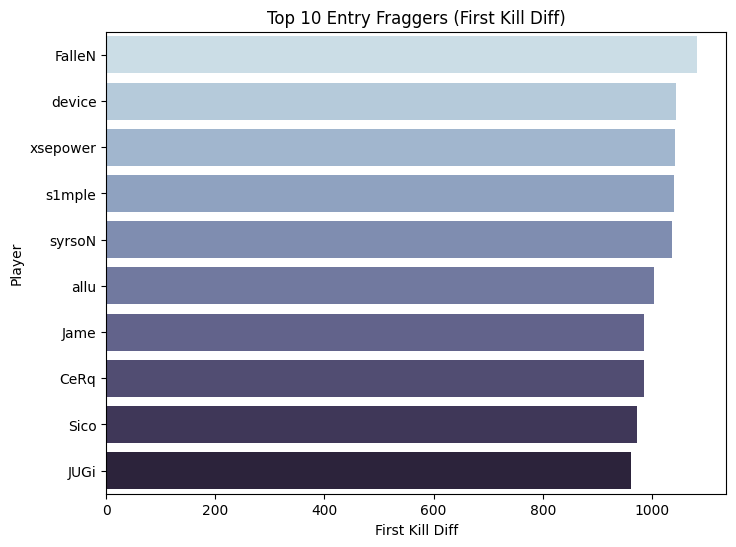

In [ ]:
query = '''
SELECT player_name, SUM(fkdiff) AS total_fkdiff
FROM players
GROUP BY player_name
ORDER BY total_fkdiff DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='total_fkdiff', y='player_name', palette='ch:s=.25,rot=-.25')
plt.title('Top 10 Entry Fraggers (First Kill Diff)')
plt.xlabel('First Kill Diff')
plt.ylabel('Player')
plt.show()


<ipython-input-81-046cf2de7a03>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_rating', y='player_name', palette='viridis')


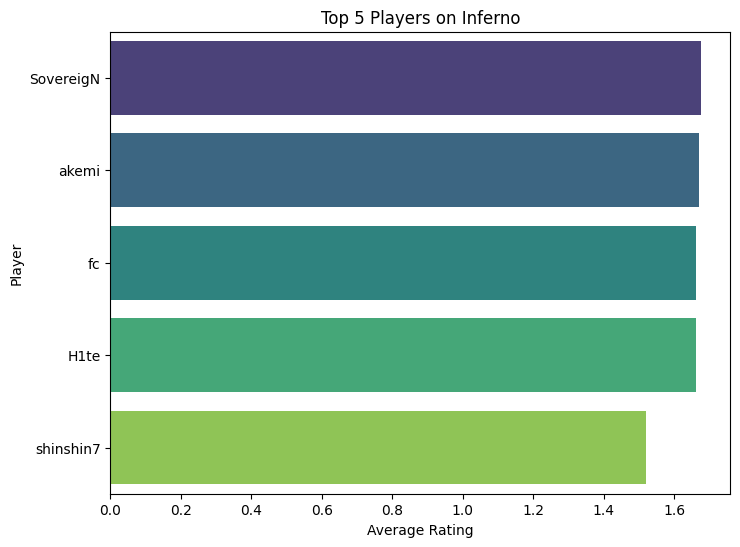

<ipython-input-81-046cf2de7a03>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_rating', y='player_name', palette='viridis')


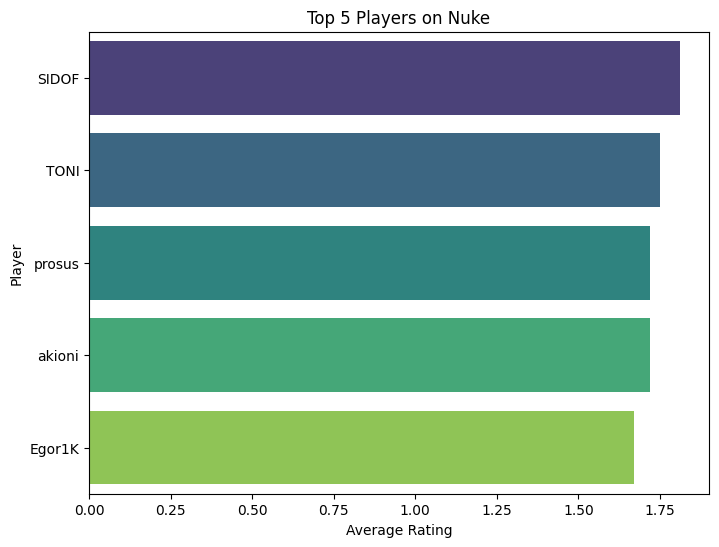

<ipython-input-81-046cf2de7a03>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_rating', y='player_name', palette='viridis')


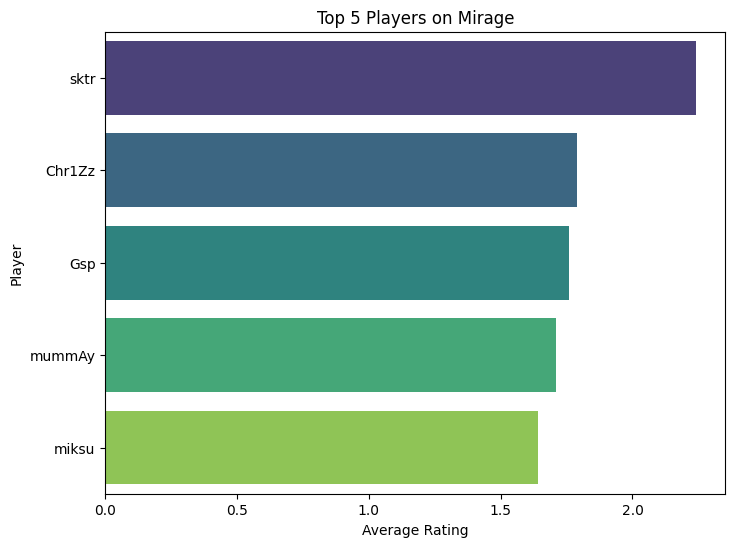

In [ ]:
for map_name in ['Inferno', 'Nuke', 'Mirage']:
    query = f'''
    SELECT player_name, AVG(rating) AS avg_rating
    FROM players p
    JOIN results r ON p.match_id = r.match_id
    WHERE r._map = '{map_name}'
    GROUP BY player_name
    ORDER BY avg_rating DESC
    LIMIT 5
    '''
    df = pd.read_sql(query, conn)

    plt.figure(figsize=(8,6))
    sns.barplot(data=df, x='avg_rating', y='player_name', palette='viridis')
    plt.title(f'Top 5 Players on {map_name}')
    plt.xlabel('Average Rating')
    plt.ylabel('Player')
    plt.show()


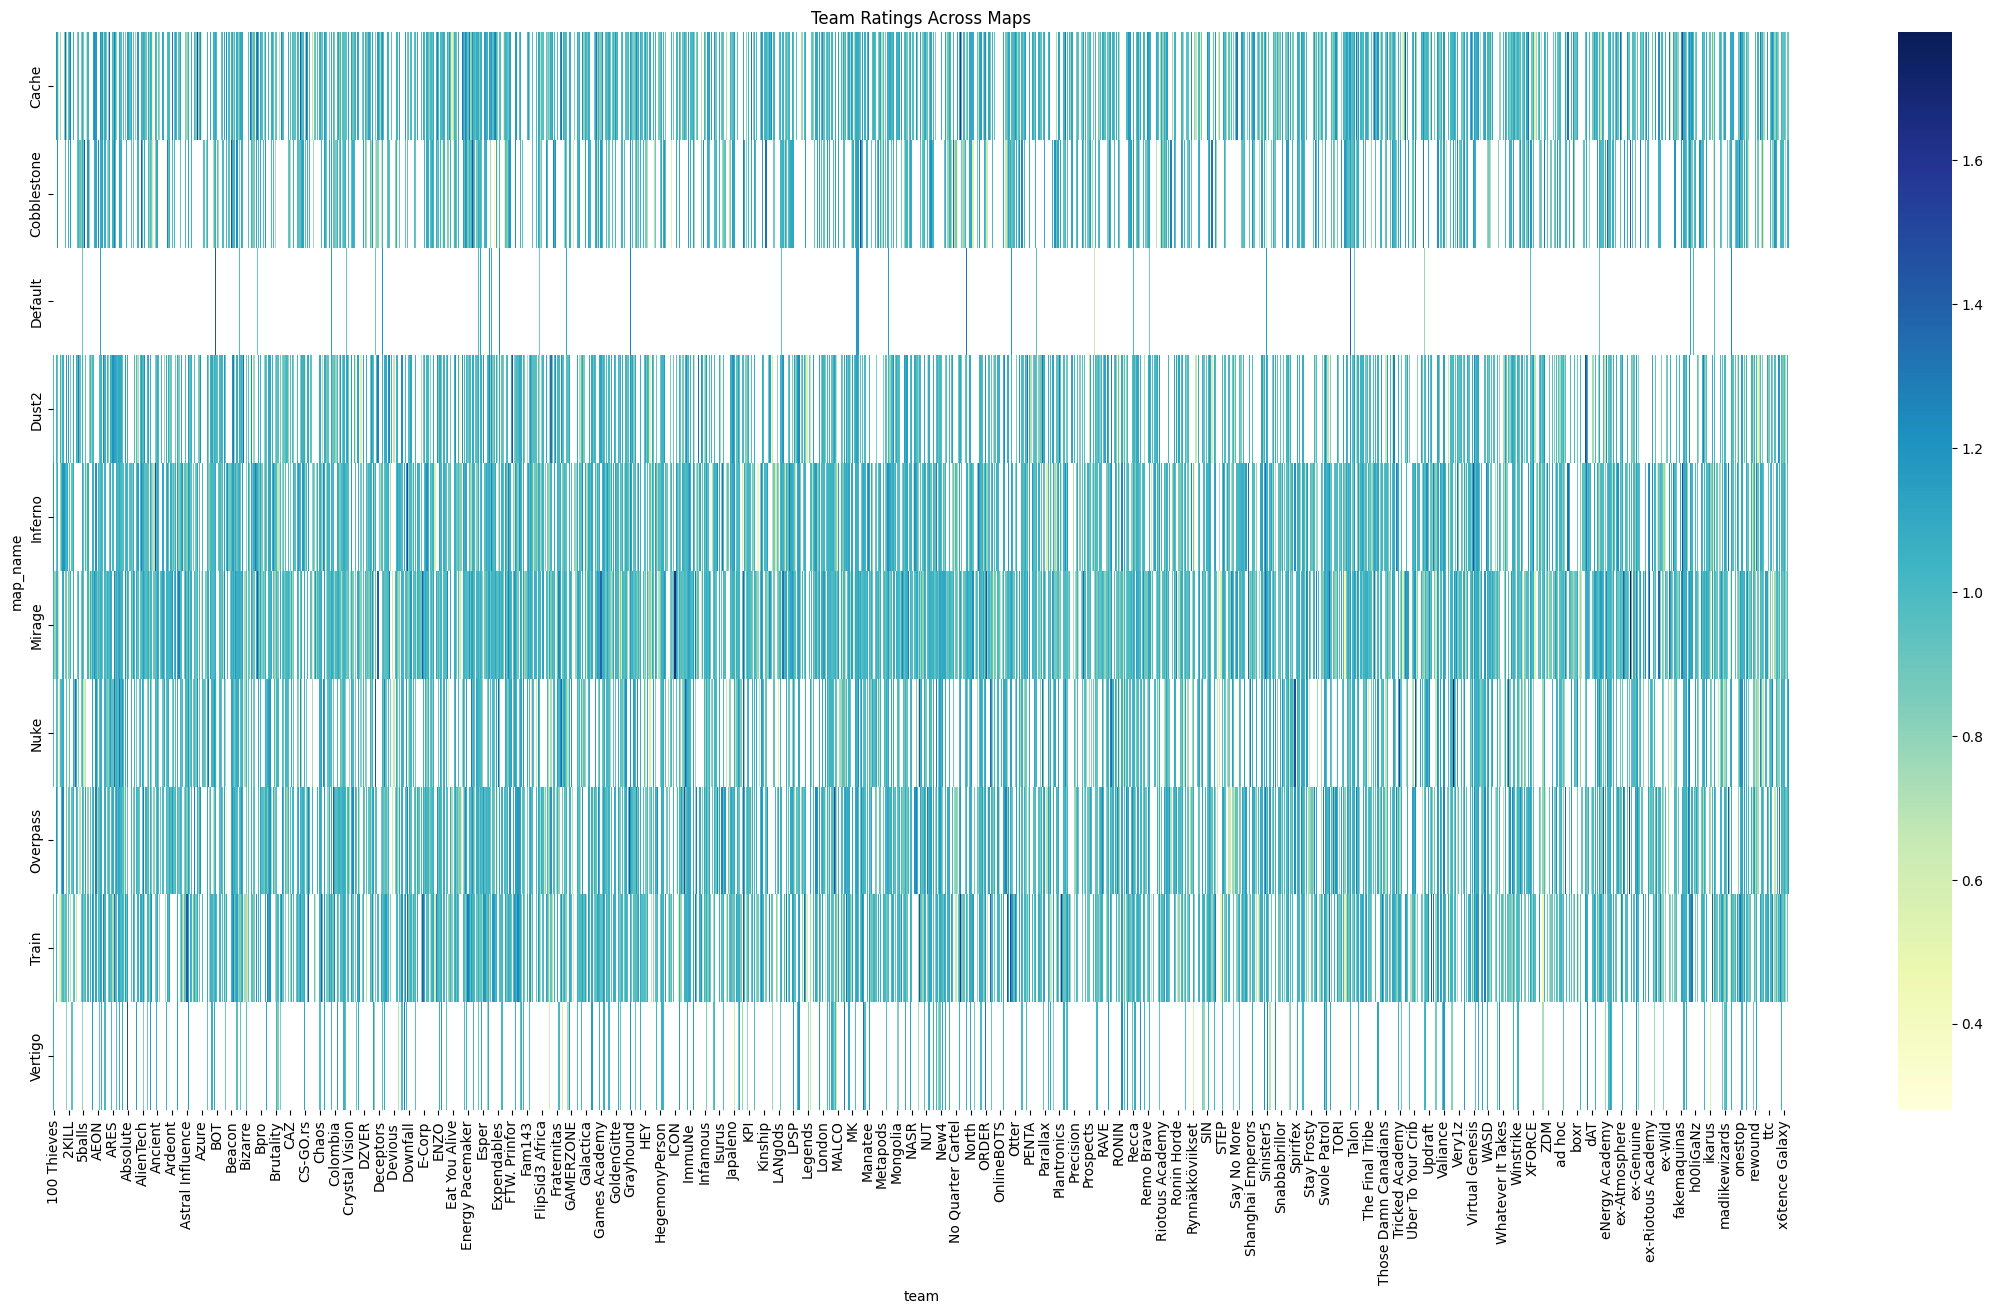

In [ ]:
query = '''
SELECT r._map AS map_name, p.team, AVG(p.rating) AS avg_rating
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r._map, p.team
'''
df = pd.read_sql(query, conn)
pivot = df.pivot(index='map_name', columns='team', values='avg_rating')

plt.figure(figsize=(28,14))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Team Ratings Across Maps')
plt.show()


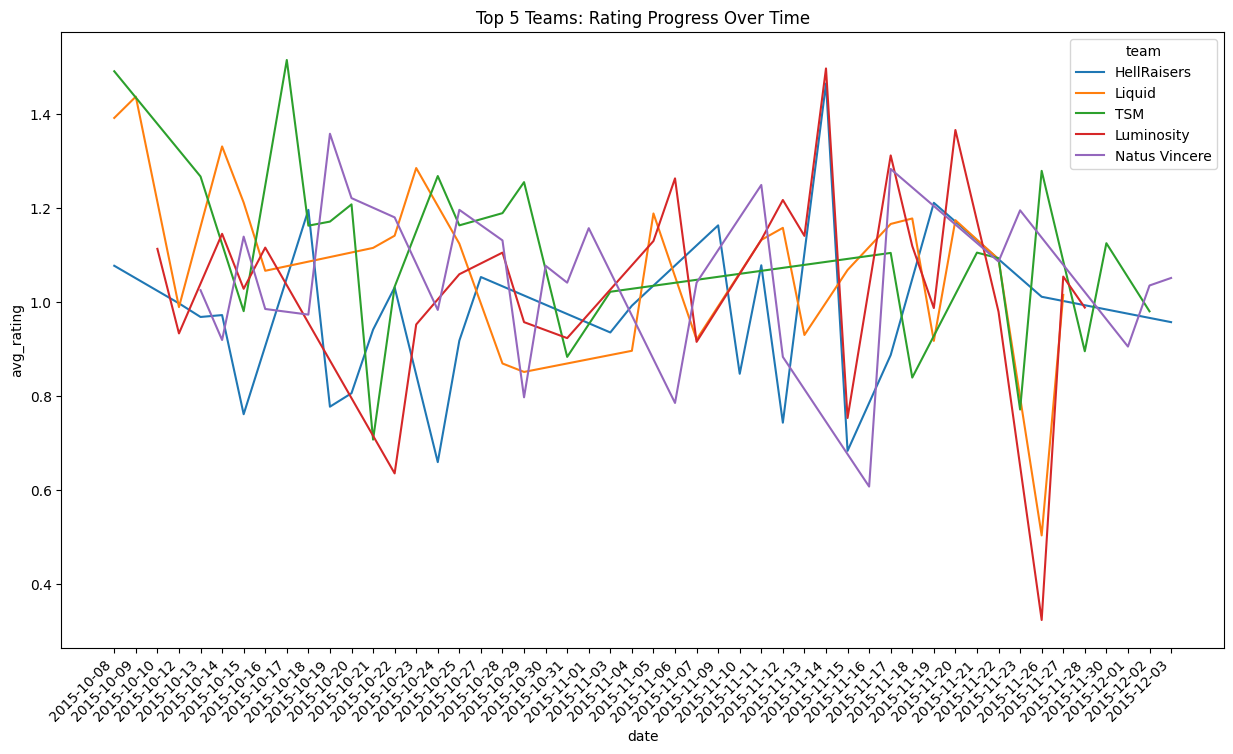

In [ ]:
query = '''
SELECT date, team, AVG(rating) AS avg_rating
FROM players
GROUP BY date, team
ORDER BY date
limit 1500
'''
df = pd.read_sql(query, conn)
top_teams = df['team'].value_counts().head(5).index
df_top = df[df['team'].isin(top_teams)]

plt.figure(figsize=(15,8))
sns.lineplot(data=df_top, x='date', y='avg_rating', hue='team')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Teams: Rating Progress Over Time')
plt.show()


In [ ]:
print(X.isnull().sum())
print(np.isinf(X).sum())


const             0
avg_rating        0
avg_adr         286
total_kddiff      0
dtype: int64
const           0
avg_rating      0
avg_adr         0
total_kddiff    0
dtype: int64


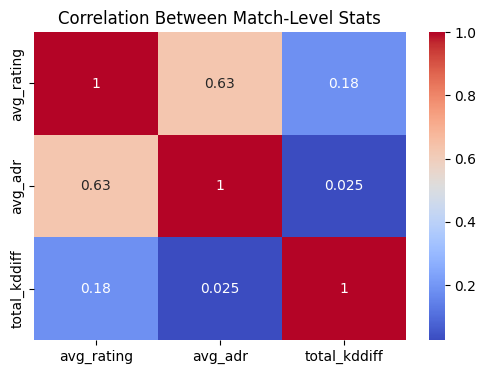

In [ ]:
query = '''
SELECT AVG(rating) AS avg_rating, AVG(adr) AS avg_adr, SUM(kills - deaths) AS total_kddiff
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r.match_id, r.match_winner
'''
df = pd.read_sql(query, conn)

# Drop missing ADR rows for correlation
df_clean = df.dropna()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Match-Level Stats')
plt.show()


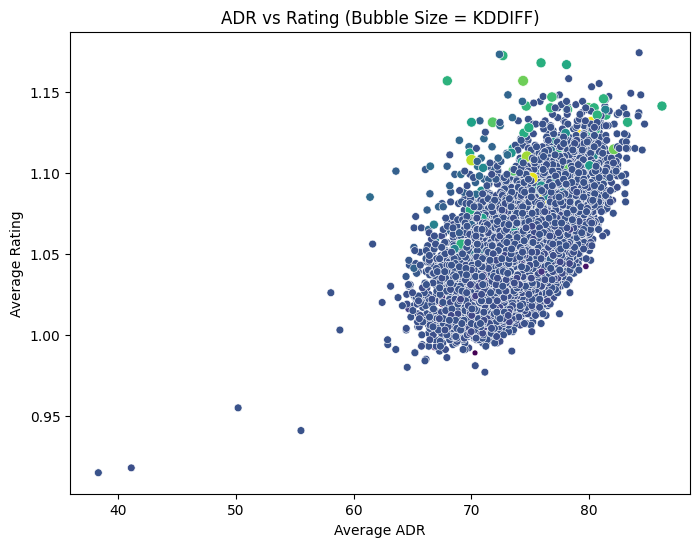

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='avg_adr', y='avg_rating', size='total_kddiff', hue='total_kddiff', palette='viridis', legend=False)
plt.title('ADR vs Rating (Bubble Size = KDDIFF)')
plt.xlabel('Average ADR')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
df_sorted = df.sort_values(by='total_kddiff', ascending=False).head(10)
print(df_sorted[['avg_rating', 'avg_adr', 'total_kddiff']])


       avg_rating    avg_adr  total_kddiff
2417     1.123333  79.077778           111
4782     1.131111  80.188889           108
15325    1.081111  75.500000           105
25661    1.096667  75.166667           105
23913    1.083333  76.100000           105
1832     1.107778  75.111111           102
21386    1.107778  70.022222            96
155      1.052222        NaN            90
17555    1.110000  74.722222            90
1445     1.098889  80.522222            90


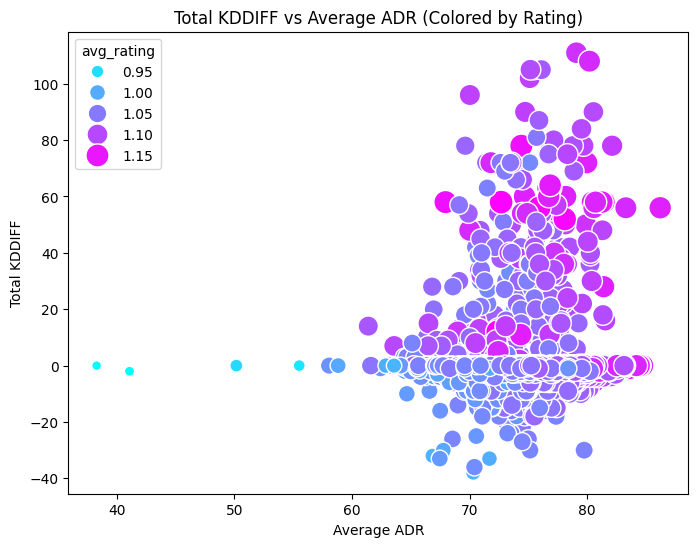

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='avg_adr', y='total_kddiff', hue='avg_rating', size='avg_rating', palette='cool', sizes=(50,300))
plt.title('Total KDDIFF vs Average ADR (Colored by Rating)')
plt.xlabel('Average ADR')
plt.ylabel('Total KDDIFF')
plt.show()


<ipython-input-107-0a96afab7207>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='total_kddiff', y=df_top10.index, palette='magma')


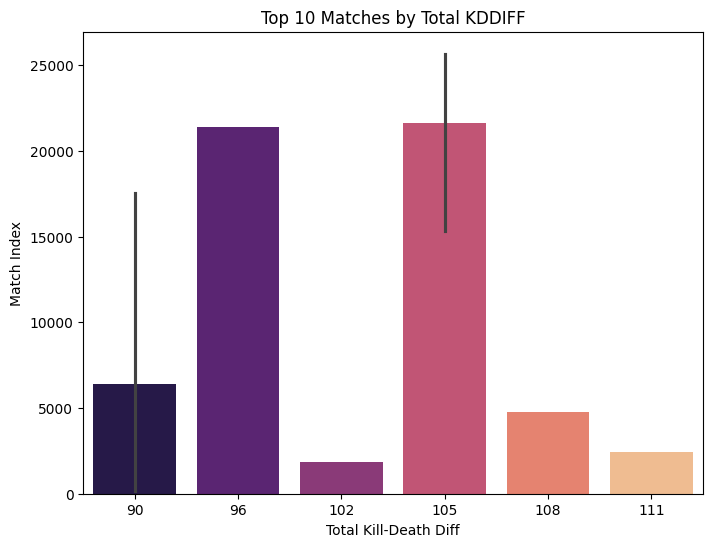

In [ ]:
df_top10 = df.sort_values(by='total_kddiff', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(data=df_top10, x='total_kddiff', y=df_top10.index, palette='magma')
plt.title('Top 10 Matches by Total KDDIFF')
plt.xlabel('Total Kill-Death Diff')
plt.ylabel('Match Index')
plt.show()


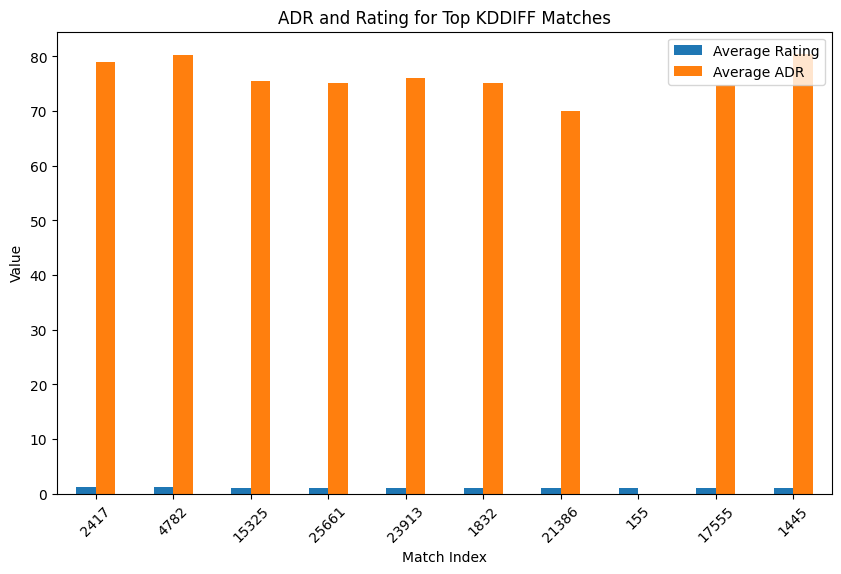

In [ ]:
df_top10[['avg_rating', 'avg_adr']].plot(kind='bar', figsize=(10,6))
plt.title('ADR and Rating for Top KDDIFF Matches')
plt.xlabel('Match Index')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Average Rating', 'Average ADR'])
plt.show()


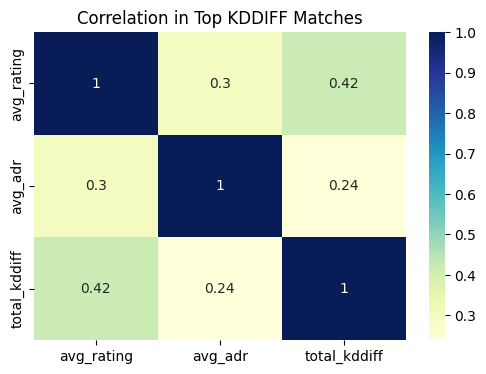

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_top10.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation in Top KDDIFF Matches')
plt.show()


<ipython-input-110-f9bc258b3db3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_rating', y='map_name', palette='viridis')


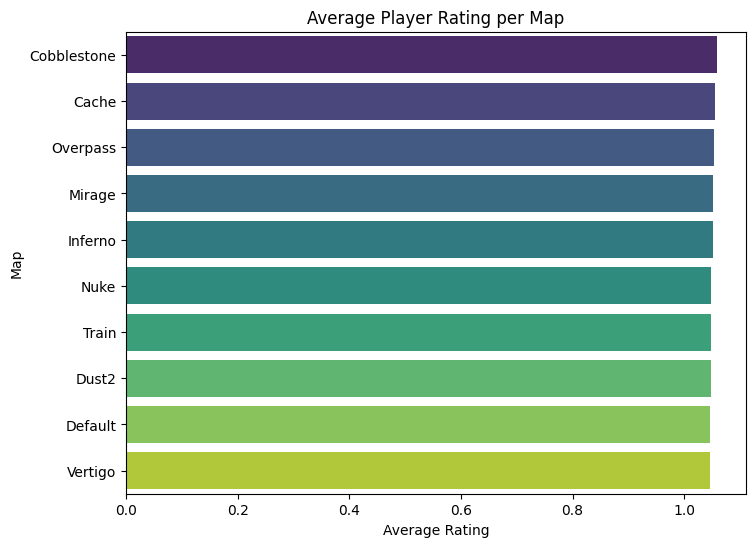

In [ ]:
query = '''
SELECT r._map AS map_name, AVG(p.rating) AS avg_rating
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r._map
ORDER BY avg_rating DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='avg_rating', y='map_name', palette='viridis')
plt.title('Average Player Rating per Map')
plt.xlabel('Average Rating')
plt.ylabel('Map')
plt.show()


<ipython-input-111-c3a9600a17b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_adr', y='map_name', palette='crest')


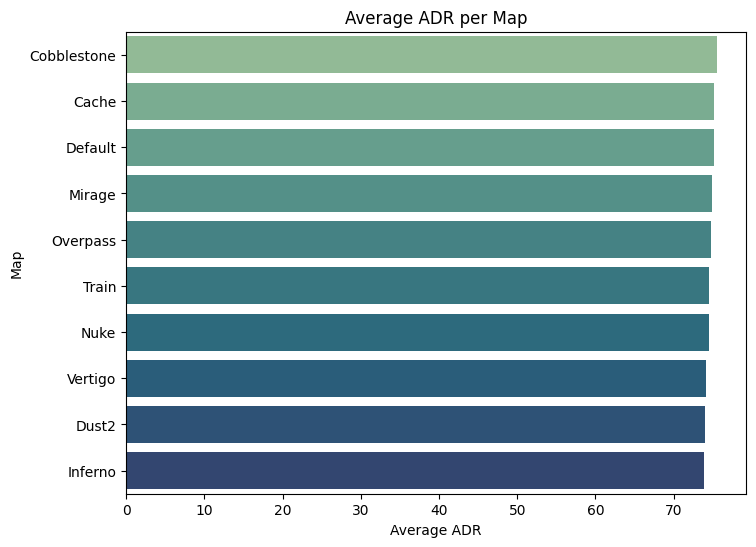

In [ ]:
query = '''
SELECT r._map AS map_name, AVG(p.adr) AS avg_adr
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r._map
ORDER BY avg_adr DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='avg_adr', y='map_name', palette='crest')
plt.title('Average ADR per Map')
plt.xlabel('Average ADR')
plt.ylabel('Map')
plt.show()


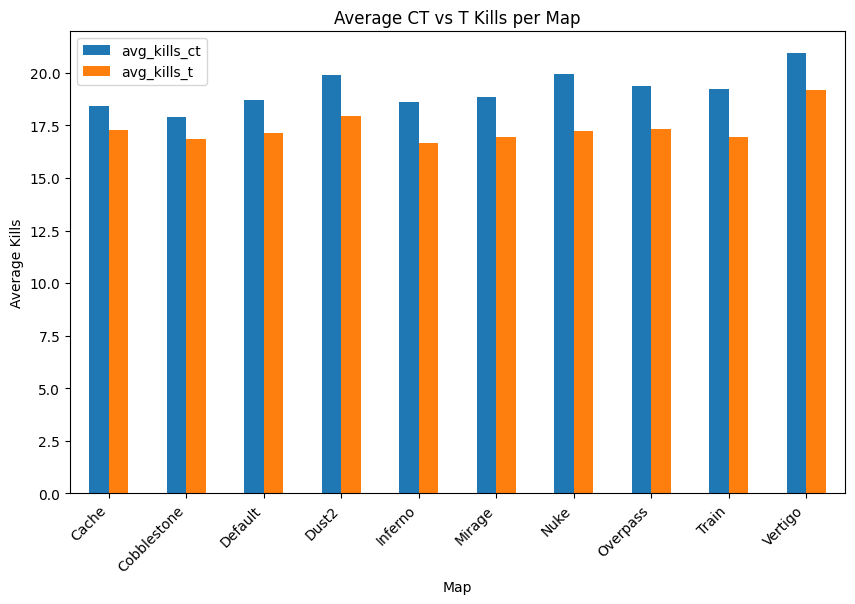

In [ ]:
query = '''
SELECT r._map AS map_name, AVG(p.kills_ct) AS avg_kills_ct, AVG(p.kills_t) AS avg_kills_t
FROM players p
JOIN results r ON p.match_id = r.match_id
GROUP BY r._map
'''
df = pd.read_sql(query, conn)

df.plot(x='map_name', y=['avg_kills_ct', 'avg_kills_t'], kind='bar', figsize=(10,6))
plt.title('Average CT vs T Kills per Map')
plt.xlabel('Map')
plt.ylabel('Average Kills')
plt.xticks(rotation=45, ha='right')
plt.show()


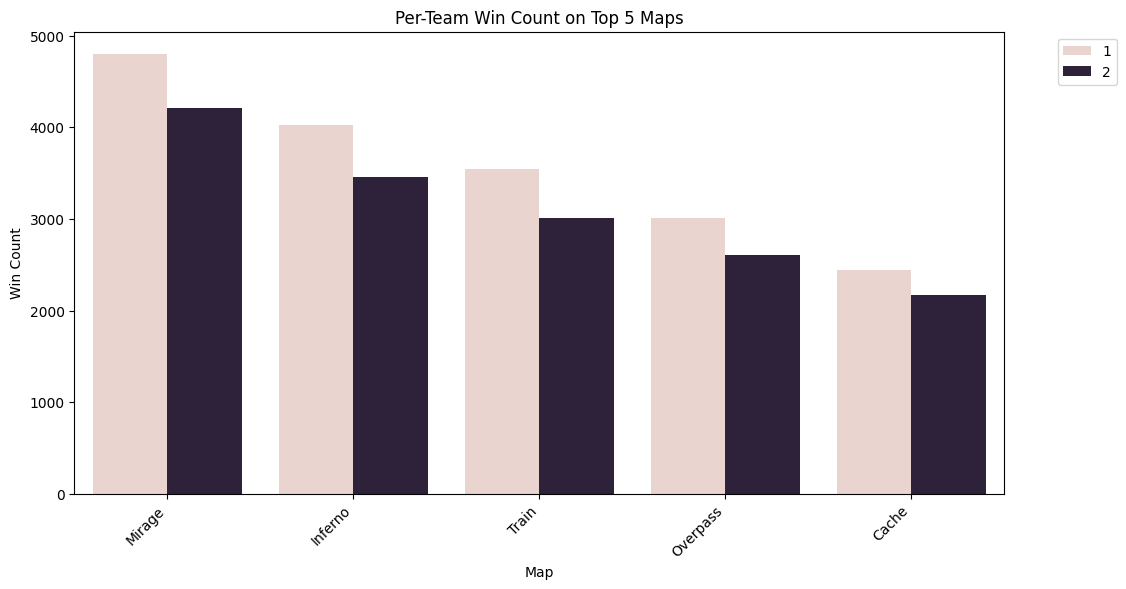

In [ ]:
query = '''
SELECT r._map AS map_name, r.match_winner AS team, COUNT(*) AS win_count
FROM results r
GROUP BY r._map, r.match_winner
ORDER BY win_count DESC
'''
df = pd.read_sql(query, conn)

top_maps = df['map_name'].value_counts().head(5).index
df_top = df[df['map_name'].isin(top_maps)]

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='map_name', y='win_count', hue='team')
plt.title('Per-Team Win Count on Top 5 Maps')
plt.ylabel('Win Count')
plt.xlabel('Map')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
query = '''
SELECT p1.player_name AS player_1, p2.player_name AS player_2,
       COUNT(*) AS matches_faced,
       AVG(p1.kills) AS p1_avg_kills, AVG(p2.kills) AS p2_avg_kills,
       AVG(p1.rating) AS p1_avg_rating, AVG(p2.rating) AS p2_avg_rating
FROM players p1
JOIN players p2 ON p1.match_id = p2.match_id AND p1.team != p2.team
WHERE p1.player_name < p2.player_name  -- avoid duplicates like A-B and B-A
GROUP BY p1.player_name, p2.player_name
HAVING matches_faced >= 5
ORDER BY matches_faced DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)

print(df[['player_1', 'player_2', 'matches_faced', 'p1_avg_kills', 'p2_avg_kills', 'p1_avg_rating', 'p2_avg_rating']])


   player_1 player_2  matches_faced  p1_avg_kills  p2_avg_kills  \
0    Savage   Summer             57     43.526316     46.649123   
1  Attacker   Savage             56     45.089286     42.750000   
2  Attacker  zhokiNg             55     44.745455     43.309091   
3     Xyp9x     rain             55     25.490909     24.436364   
4   dupreeh     rain             55     26.290909     24.436364   
5      NiKo    Xyp9x             54     26.833333     24.055556   
6      NiKo  dupreeh             54     26.833333     24.796296   
7    Summer  zhokiNg             54     47.592593     44.574074   
8     nitr0    tarik             54     27.851852     26.222222   
9     EliGE    tarik             53     31.113208     26.358491   

   p1_avg_rating  p2_avg_rating  
0       1.044912       1.155965  
1       1.114107       1.044107  
2       1.117455       1.027818  
3       1.137091       0.975636  
4       1.113455       0.975636  
5       1.133148       1.096296  
6       1.133148       1

<ipython-input-120-ffc71d9af81b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='matches_faced', y=df['player_1'] + ' vs ' + df['player_2'], palette='flare')


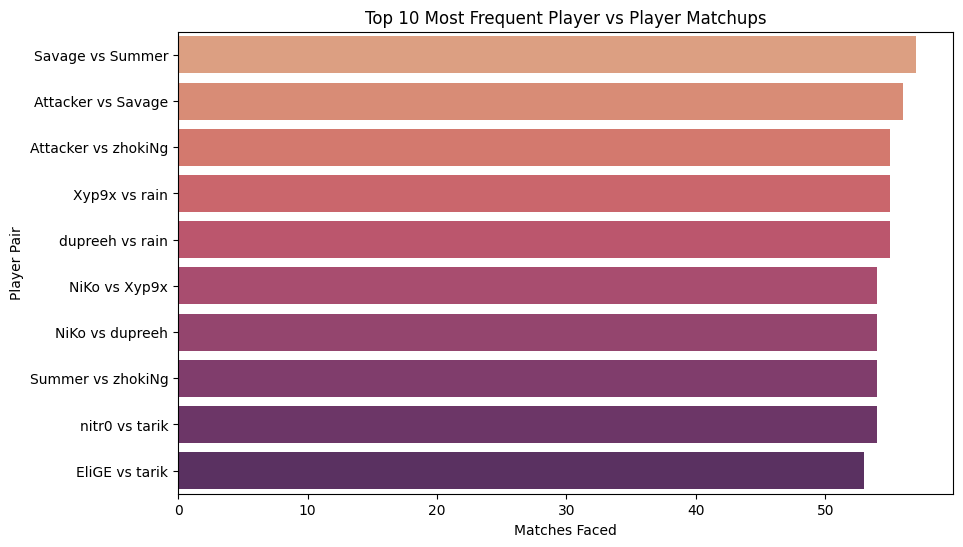

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='matches_faced', y=df['player_1'] + ' vs ' + df['player_2'], palette='flare')
plt.title('Top 10 Most Frequent Player vs Player Matchups')
plt.xlabel('Matches Faced')
plt.ylabel('Player Pair')
plt.show()


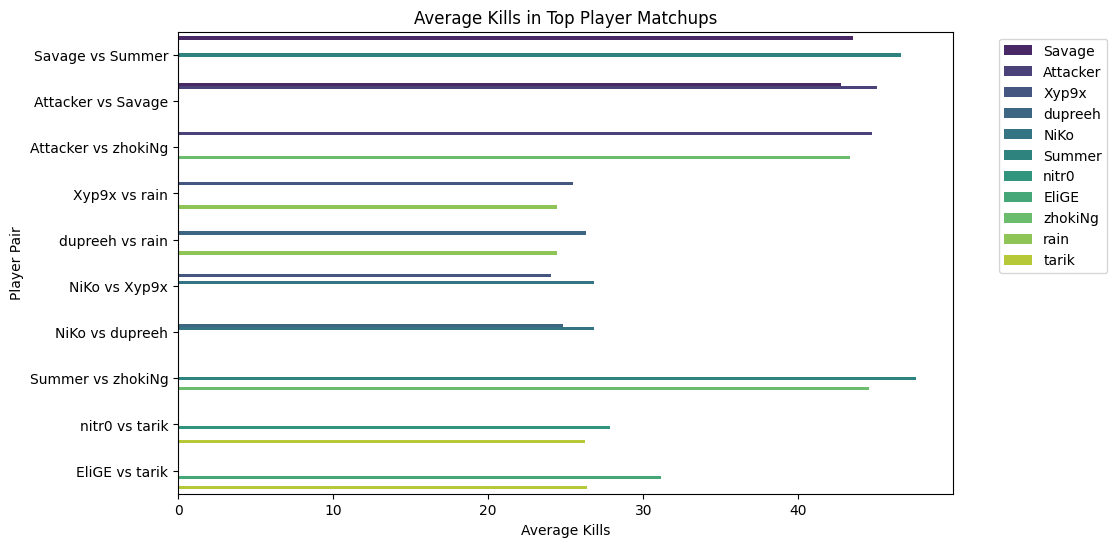

In [ ]:
df_melted = pd.melt(df, id_vars=['player_1', 'player_2'], value_vars=['p1_avg_kills', 'p2_avg_kills'],
                    var_name='Player', value_name='Average Kills')

df_melted['Player Name'] = df_melted.apply(lambda x: x['player_1'] if 'p1' in x['Player'] else x['player_2'], axis=1)

plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x='Average Kills', y=df_melted['player_1'] + ' vs ' + df_melted['player_2'],
            hue='Player Name', palette='viridis')
plt.title('Average Kills in Top Player Matchups')
plt.xlabel('Average Kills')
plt.ylabel('Player Pair')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


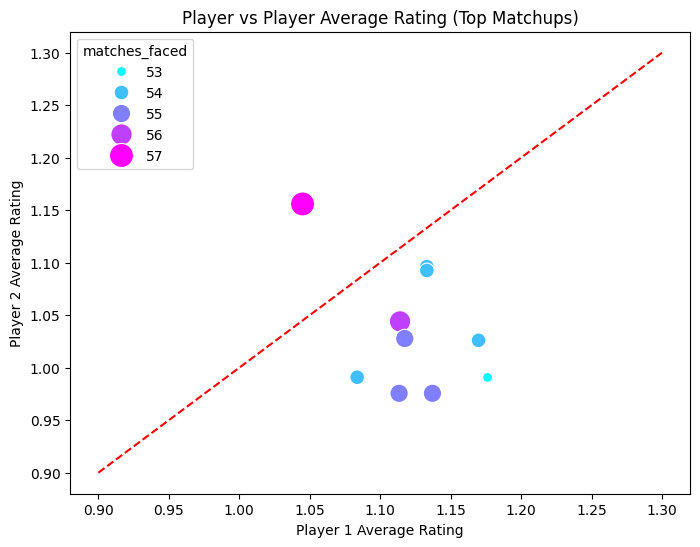

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='p1_avg_rating', y='p2_avg_rating', size='matches_faced', hue='matches_faced', sizes=(50,300), palette='cool')
plt.plot([0.9, 1.3], [0.9, 1.3], 'r--')  # identity line
plt.title('Player vs Player Average Rating (Top Matchups)')
plt.xlabel('Player 1 Average Rating')
plt.ylabel('Player 2 Average Rating')
plt.show()


<ipython-input-131-4e5ab5bad58f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('conversion_rate', ascending=False), x='conversion_rate', y='team', palette='crest')


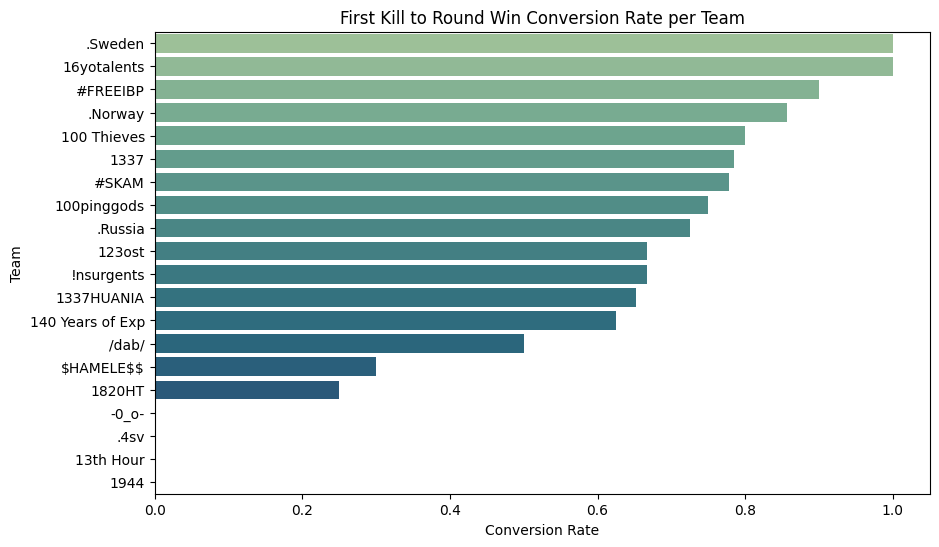

In [ ]:
query = '''
SELECT team, SUM(CASE WHEN fkdiff > 0 THEN 1 ELSE 0 END) AS first_kill_rounds,
       SUM(CASE WHEN fkdiff > 0 AND kddiff > 0 THEN 1 ELSE 0 END) AS first_kill_win_rounds
FROM players
GROUP BY team
LIMIT 20
'''
df = pd.read_sql(query, conn)
df['conversion_rate'] = df['first_kill_win_rounds'] / df['first_kill_rounds']

plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('conversion_rate', ascending=False), x='conversion_rate', y='team', palette='crest')
plt.title('First Kill to Round Win Conversion Rate per Team')
plt.xlabel('Conversion Rate')
plt.ylabel('Team')
plt.show()


<ipython-input-125-675970c776a4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=entry_df, x='total_fkdiff', y='player_name', palette='rocket', ax=axs[0])
<ipython-input-125-675970c776a4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=support_df, x='total_flash_assists', y='player_name', palette='viridis', ax=axs[1])


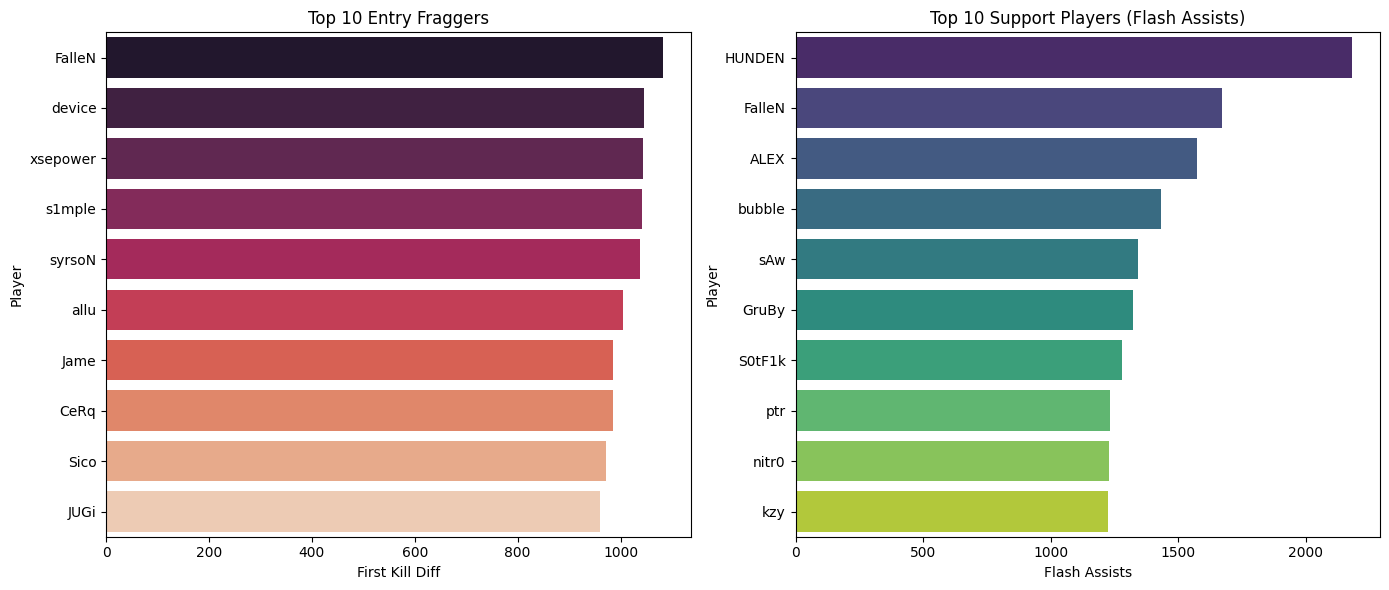

In [ ]:
# Entry fraggers
query = '''
SELECT player_name, SUM(fkdiff) AS total_fkdiff
FROM players
GROUP BY player_name
ORDER BY total_fkdiff DESC
LIMIT 10
'''
entry_df = pd.read_sql(query, conn)

# Support players
query = '''
SELECT player_name, SUM(flash_assists) AS total_flash_assists
FROM players
GROUP BY player_name
ORDER BY total_flash_assists DESC
LIMIT 10
'''
support_df = pd.read_sql(query, conn)

# Combine plots
fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=entry_df, x='total_fkdiff', y='player_name', palette='rocket', ax=axs[0])
axs[0].set_title('Top 10 Entry Fraggers')
axs[0].set_xlabel('First Kill Diff')
axs[0].set_ylabel('Player')

sns.barplot(data=support_df, x='total_flash_assists', y='player_name', palette='viridis', ax=axs[1])
axs[1].set_title('Top 10 Support Players (Flash Assists)')
axs[1].set_xlabel('Flash Assists')
axs[1].set_ylabel('Player')

plt.tight_layout()
plt.show()


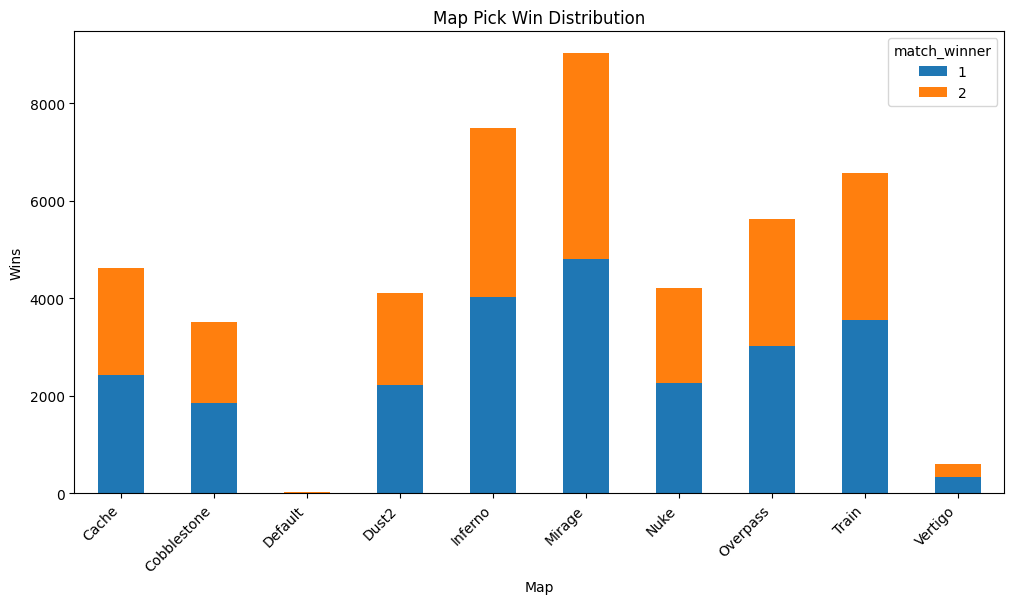

In [ ]:
query = '''
SELECT _map AS map_name, match_winner, COUNT(*) AS wins
FROM results
GROUP BY _map, match_winner
'''
df = pd.read_sql(query, conn)

pivot = df.pivot(index='map_name', columns='match_winner', values='wins').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Map Pick Win Distribution')
plt.ylabel('Wins')
plt.xlabel('Map')
plt.xticks(rotation=45, ha='right')
plt.show()


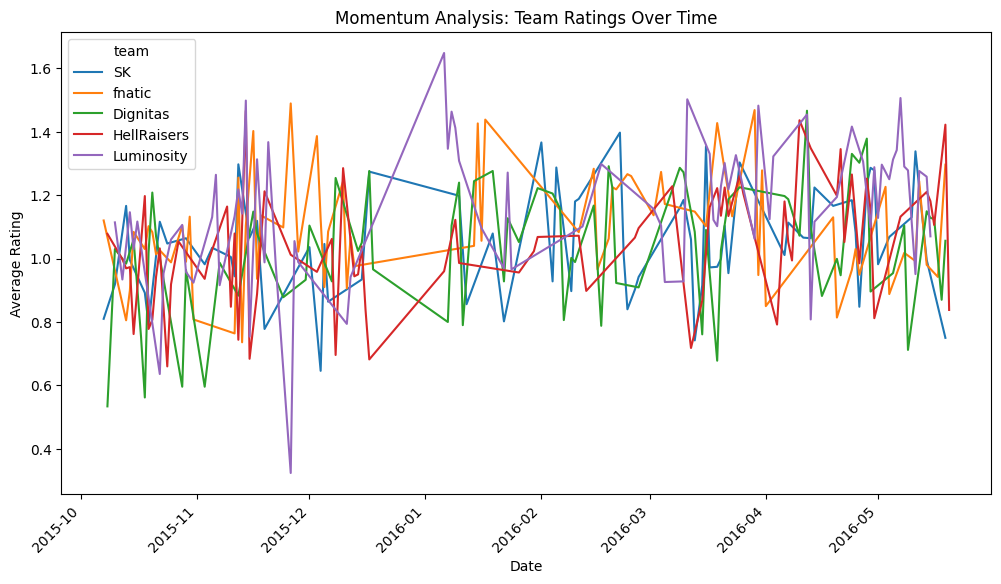

In [ ]:
query = '''
SELECT date, team, AVG(rating) AS avg_team_rating
FROM players
GROUP BY date, team
ORDER BY date
LIMIT 5000
'''
df = pd.read_sql(query, conn)
df['date'] = pd.to_datetime(df['date'])

top_teams = df['team'].value_counts().head(5).index
df_top = df[df['team'].isin(top_teams)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_top, x='date', y='avg_team_rating', hue='team')
plt.title('Momentum Analysis: Team Ratings Over Time')
plt.ylabel('Average Rating')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
fav_players = ['rain', 'aleksib', 'device', 'ropz', 'xyp9x', 'broky']

query = f'''
SELECT player_name, AVG(rating) AS avg_rating, AVG(adr) AS avg_adr, SUM(kills) AS total_kills,
       SUM(deaths) AS total_deaths, SUM(fkdiff) AS total_fkdiff, SUM(flash_assists) AS total_flash_assists
FROM players
WHERE player_name IN {tuple(fav_players)}
GROUP BY player_name
ORDER BY avg_rating DESC
'''
df = pd.read_sql(query, conn)
print(df)


  player_name  avg_rating    avg_adr  total_kills  total_deaths  total_fkdiff  \
0      device    1.241604  81.823711        19345         15287          1045   
1        rain    1.162974  82.729830        21214         19884            59   
2        ropz    1.152793  78.492117        13782         11620           243   
3       broky    1.099045  73.372611         4923          4544            89   

   total_flash_assists  
0                410.0  
1                590.0  
2                426.0  
3                249.0  


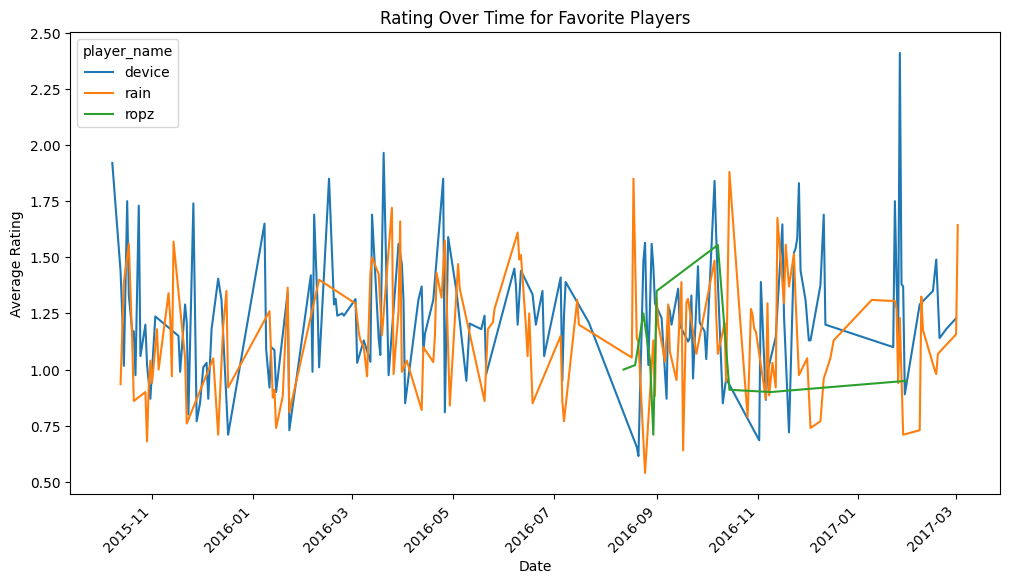

In [ ]:
query = f'''
SELECT date, player_name, AVG(rating) AS avg_rating
FROM players
WHERE player_name IN {tuple(fav_players)}
GROUP BY date, player_name
ORDER BY date
limit 300
'''
df = pd.read_sql(query, conn)
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='avg_rating', hue='player_name')
plt.title('Rating Over Time for Favorite Players')
plt.ylabel('Average Rating')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.show()


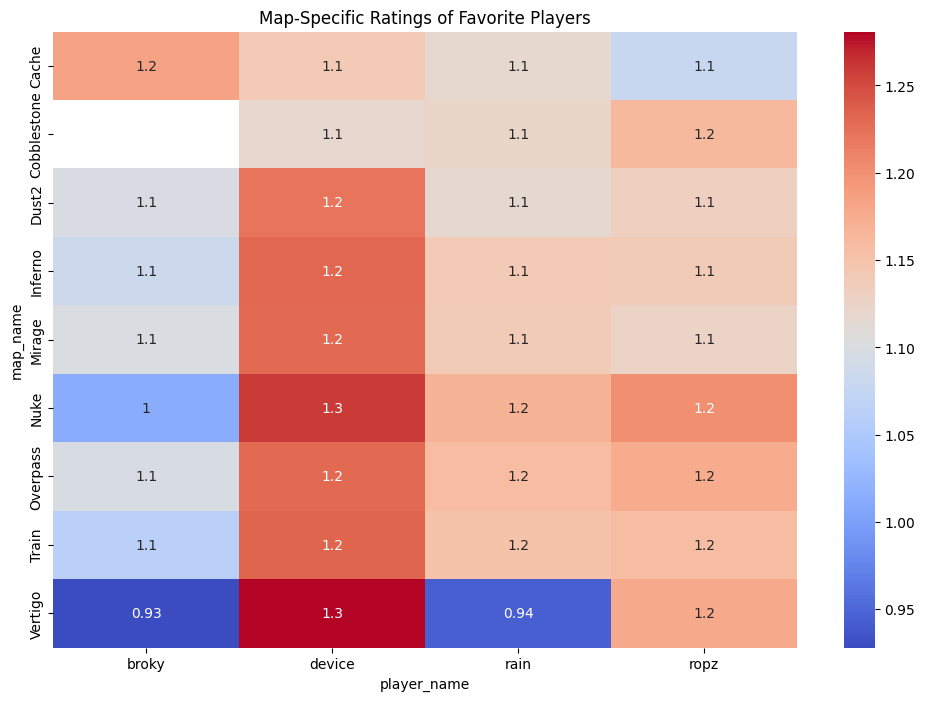

In [ ]:
query = f'''
SELECT r._map AS map_name, p.player_name, AVG(p.rating) AS avg_rating
FROM players p
JOIN results r ON p.match_id = r.match_id
WHERE p.player_name IN {tuple(fav_players)}
GROUP BY r._map, p.player_name
'''
df = pd.read_sql(query, conn)

pivot = df.pivot(index='map_name', columns='player_name', values='avg_rating')

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Map-Specific Ratings of Favorite Players')
plt.show()


<ipython-input-140-6de4d0205fdf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='total_fkdiff', y='player_name', ax=axs[0], palette='rocket')
<ipython-input-140-6de4d0205fdf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='total_flash_assists', y='player_name', ax=axs[1], palette='viridis')


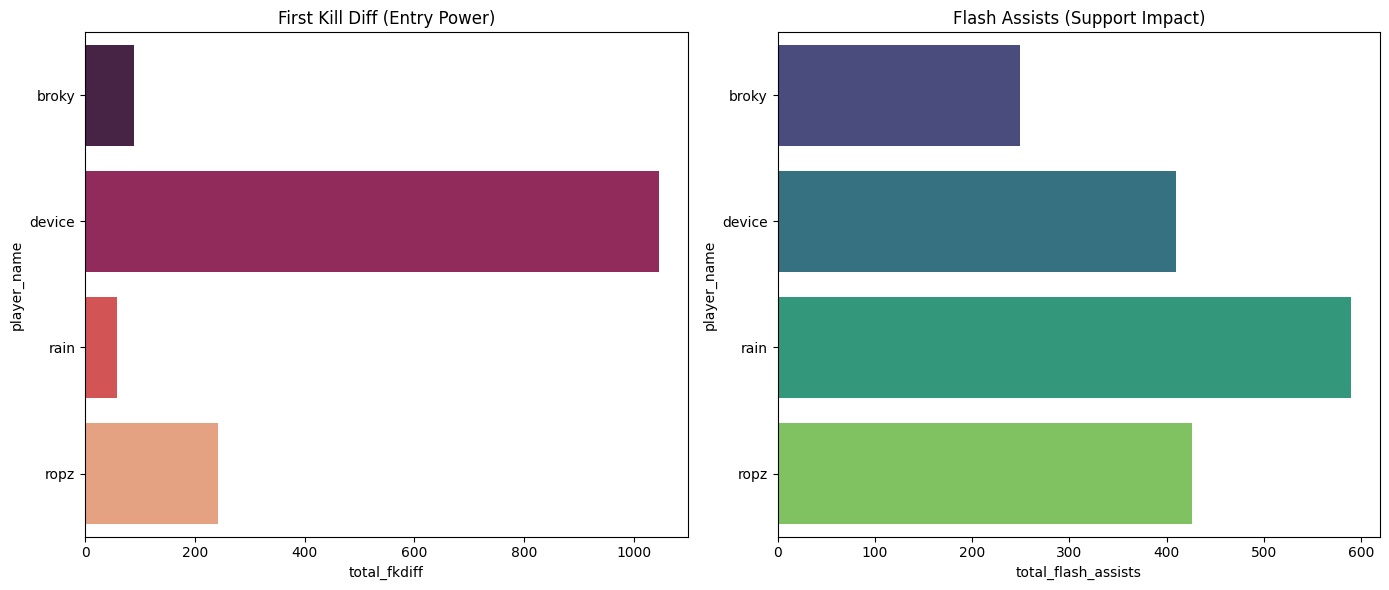

In [ ]:
query = f'''
SELECT player_name, SUM(fkdiff) AS total_fkdiff, SUM(flash_assists) AS total_flash_assists
FROM players
WHERE player_name IN {tuple(fav_players)}
GROUP BY player_name
'''
df = pd.read_sql(query, conn)

fig, axs = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=df, x='total_fkdiff', y='player_name', ax=axs[0], palette='rocket')
axs[0].set_title('First Kill Diff (Entry Power)')

sns.barplot(data=df, x='total_flash_assists', y='player_name', ax=axs[1], palette='viridis')
axs[1].set_title('Flash Assists (Support Impact)')

plt.tight_layout()
plt.show()


<ipython-input-141-e290406aba6a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='clutch_kddiff', y='player_name', palette='magma')


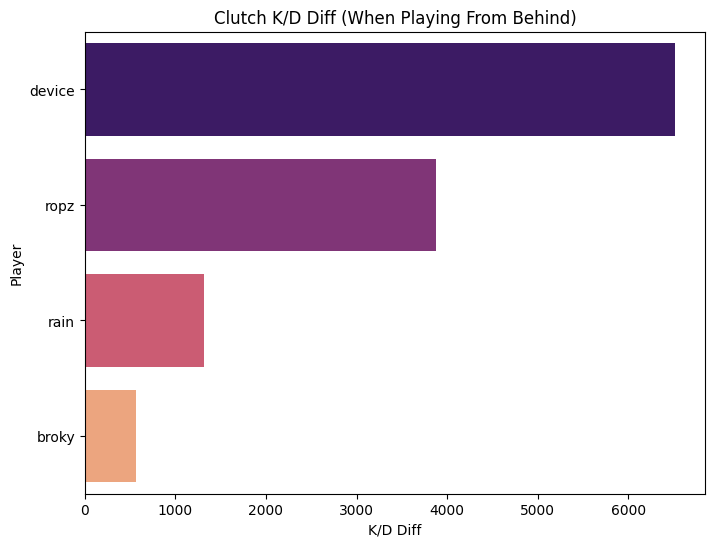

In [ ]:
query = f'''
SELECT p.player_name, SUM(p.kills - p.deaths) AS clutch_kddiff
FROM players p
JOIN results r ON p.match_id = r.match_id
WHERE p.player_name IN {tuple(fav_players)} AND p.team != r.match_winner
GROUP BY p.player_name
ORDER BY clutch_kddiff DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='clutch_kddiff', y='player_name', palette='magma')
plt.title('Clutch K/D Diff (When Playing From Behind)')
plt.xlabel('K/D Diff')
plt.ylabel('Player')
plt.show()


In [ ]:
query = f'''
SELECT p1.player_name AS player_1, p2.player_name AS player_2,
       COUNT(*) AS matches_faced,
       AVG(p1.kills) AS p1_avg_kills, AVG(p2.kills) AS p2_avg_kills,
       AVG(p1.rating) AS p1_avg_rating, AVG(p2.rating) AS p2_avg_rating
FROM players p1
JOIN players p2 ON p1.match_id = p2.match_id AND p1.team != p2.team
WHERE p1.player_name IN {tuple(fav_players)} AND p2.player_name IN {tuple(fav_players)} AND p1.player_name < p2.player_name
GROUP BY p1.player_name, p2.player_name
ORDER BY matches_faced DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
print(df)


  player_1 player_2  matches_faced  p1_avg_kills  p2_avg_kills  p1_avg_rating  \
0   device     rain             52     28.076923     24.788462       1.179615   
1     rain     ropz             30     28.400000     27.833333       1.092333   
2   device     ropz             22     30.636364     25.409091       1.223636   
3    broky   device              3     19.666667     23.000000       0.896667   
4    broky     ropz              1     37.000000     48.000000       0.920000   

   p2_avg_rating  
0       0.965769  
1       1.028667  
2       1.024091  
3       0.986667  
4       1.180000  


<ipython-input-143-3708c5bc0241>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='kd_ratio', y='player_name', palette='crest')


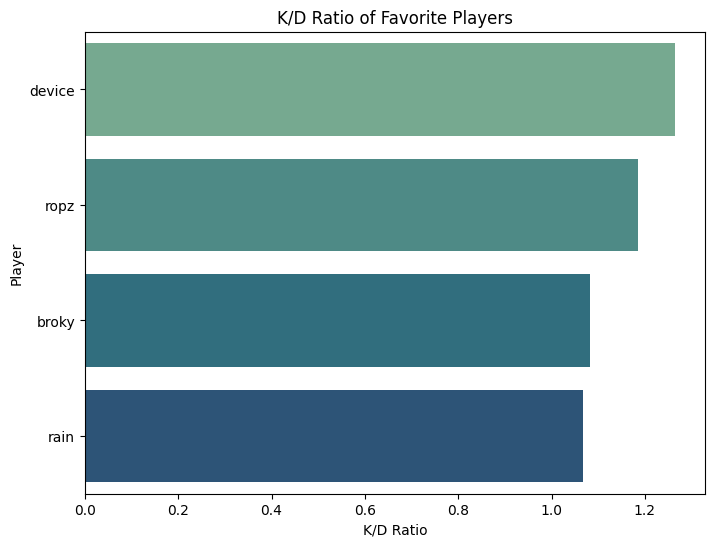

In [ ]:
query = f'''
SELECT player_name, SUM(kills)*1.0 / SUM(deaths) AS kd_ratio
FROM players
WHERE player_name IN {tuple(fav_players)}
GROUP BY player_name
ORDER BY kd_ratio DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='kd_ratio', y='player_name', palette='crest')
plt.title('K/D Ratio of Favorite Players')
plt.xlabel('K/D Ratio')
plt.ylabel('Player')
plt.show()


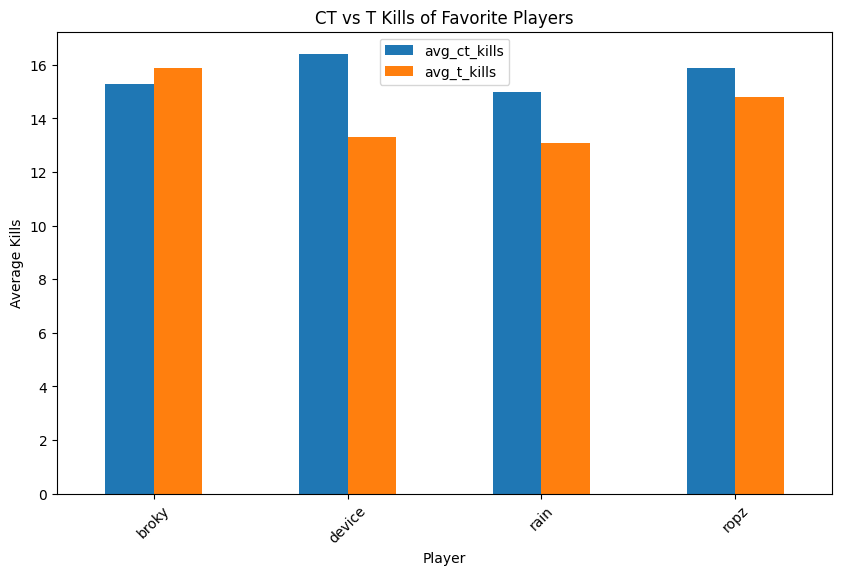

In [ ]:
query = f'''
SELECT player_name, AVG(kills_ct) AS avg_ct_kills, AVG(kills_t) AS avg_t_kills
FROM players
WHERE player_name IN {tuple(fav_players)}
GROUP BY player_name
'''
df = pd.read_sql(query, conn)

df.plot(x='player_name', y=['avg_ct_kills', 'avg_t_kills'], kind='bar', figsize=(10,6))
plt.title('CT vs T Kills of Favorite Players')
plt.xlabel('Player')
plt.ylabel('Average Kills')
plt.xticks(rotation=45)
plt.show()


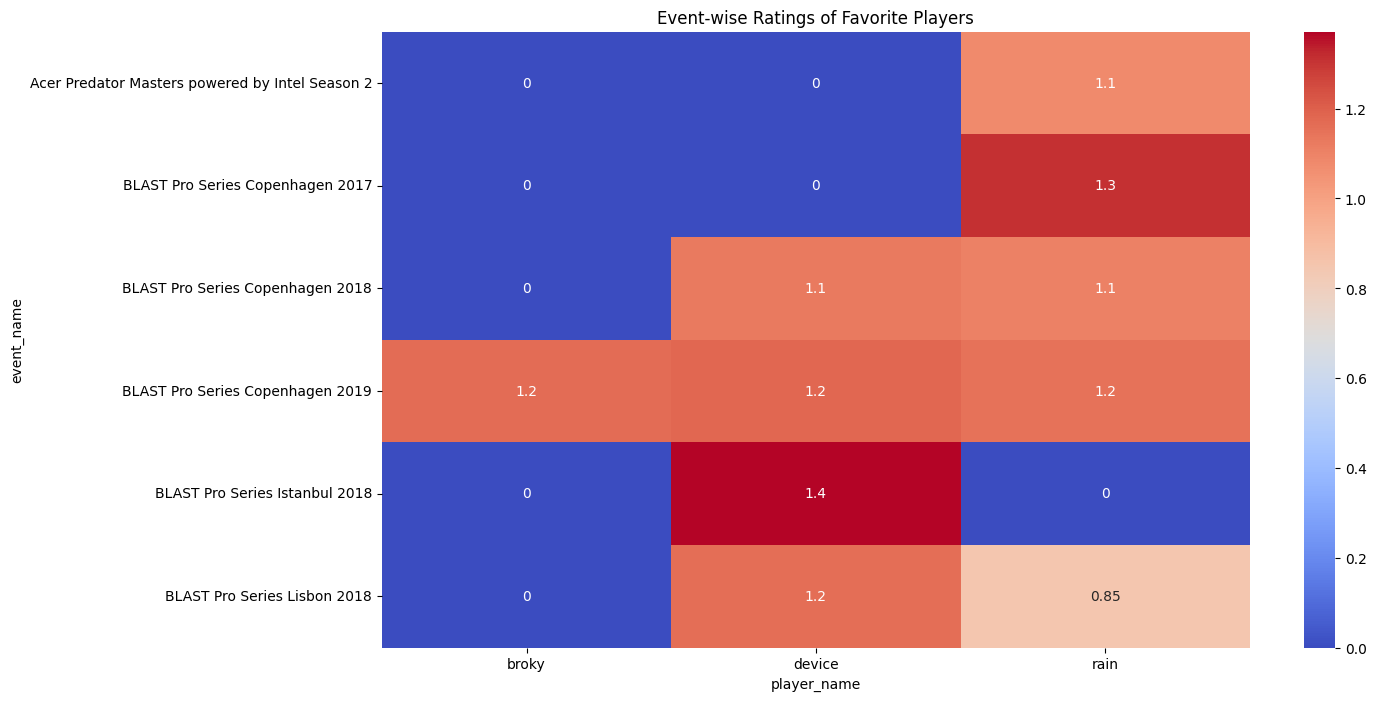

In [ ]:
query = f'''
SELECT event_name, player_name, AVG(rating) AS avg_rating
FROM players
WHERE player_name IN {tuple(fav_players)}
GROUP BY event_name, player_name
HAVING COUNT(*) > 3
limit 10
'''
df = pd.read_sql(query, conn)

pivot = df.pivot(index='event_name', columns='player_name', values='avg_rating').fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Event-wise Ratings of Favorite Players')
plt.show()


<ipython-input-148-b93f68bfc37c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='hs_percentage', y='player_name', palette='rocket')


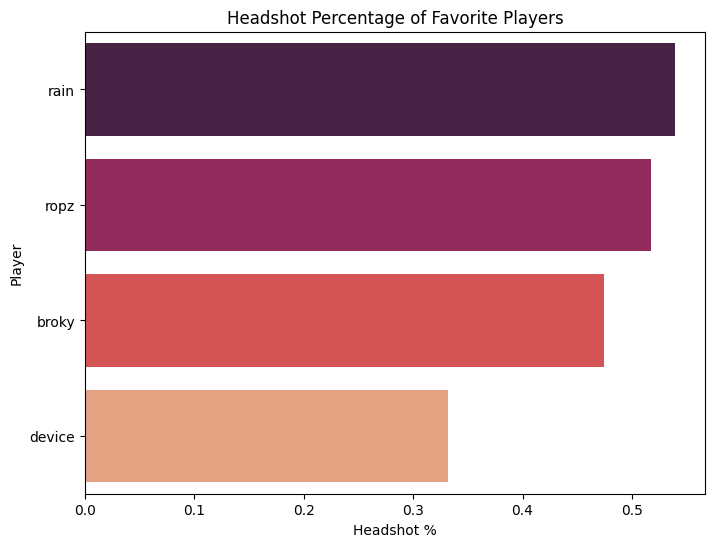

In [ ]:
query = f'''
SELECT player_name, SUM(hs)*1.0 / SUM(kills) AS hs_percentage
FROM players
WHERE player_name IN {tuple(fav_players)} AND kills > 0
GROUP BY player_name
ORDER BY hs_percentage DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='hs_percentage', y='player_name', palette='rocket')
plt.title('Headshot Percentage of Favorite Players')
plt.xlabel('Headshot %')
plt.ylabel('Player')
plt.show()


In [ ]:
query = '''
SELECT AVG(rating) AS avg_rating, AVG(adr) AS avg_adr, SUM(kills) AS total_kills,
       SUM(deaths) AS total_deaths, SUM(fkdiff) AS total_fkdiff, SUM(flash_assists) AS total_flash_assists
FROM players
WHERE player_name = 'rain'
'''
df = pd.read_sql(query, conn)
print(df)


   avg_rating   avg_adr  total_kills  total_deaths  total_fkdiff  \
0    1.162974  82.72983        21214         19884            59   

   total_flash_assists  
0                590.0  


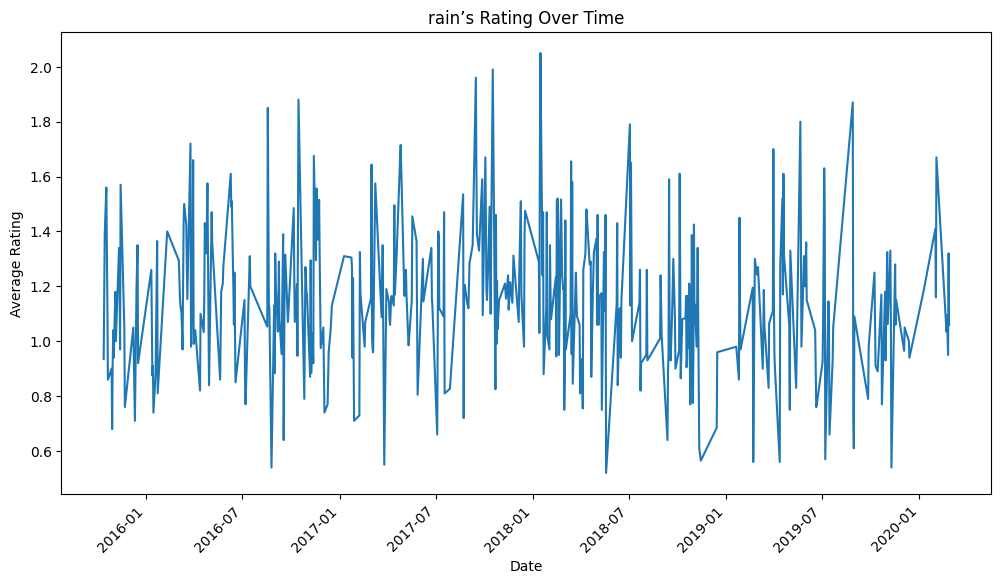

In [ ]:
query = '''
SELECT date, AVG(rating) AS avg_rating
FROM players
WHERE player_name = 'rain'
GROUP BY date
ORDER BY date
'''
df = pd.read_sql(query, conn)
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='avg_rating')
plt.title('rain’s Rating Over Time')
plt.ylabel('Average Rating')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-153-4b3e05253df6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_rating', y='map_name', palette='viridis')


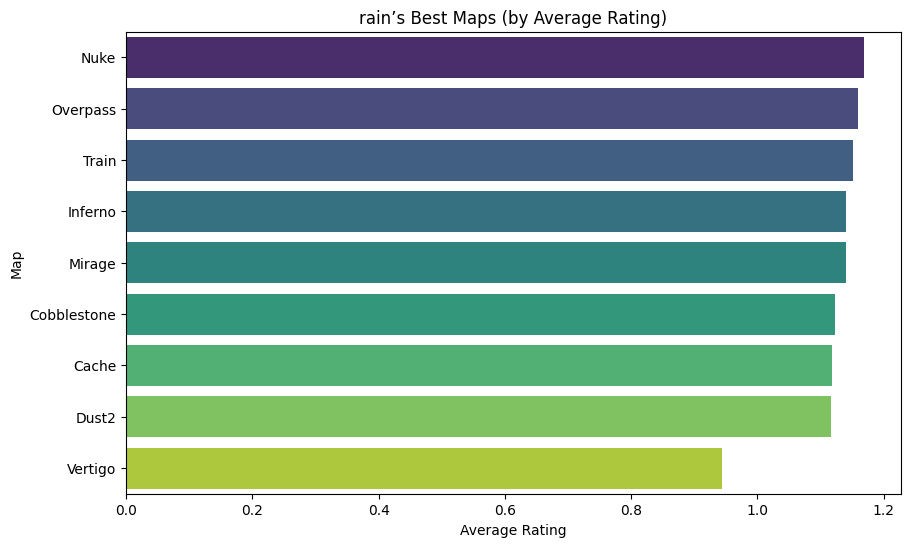

In [ ]:
query = '''
SELECT r._map AS map_name, AVG(p.rating) AS avg_rating
FROM players p
JOIN results r ON p.match_id = r.match_id
WHERE p.player_name = 'rain'
GROUP BY r._map
ORDER BY avg_rating DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='avg_rating', y='map_name', palette='viridis')
plt.title('rain’s Best Maps (by Average Rating)')
plt.xlabel('Average Rating')
plt.ylabel('Map')
plt.show()


<ipython-input-156-eaae35384151>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_rating', y='event_name', palette='crest')


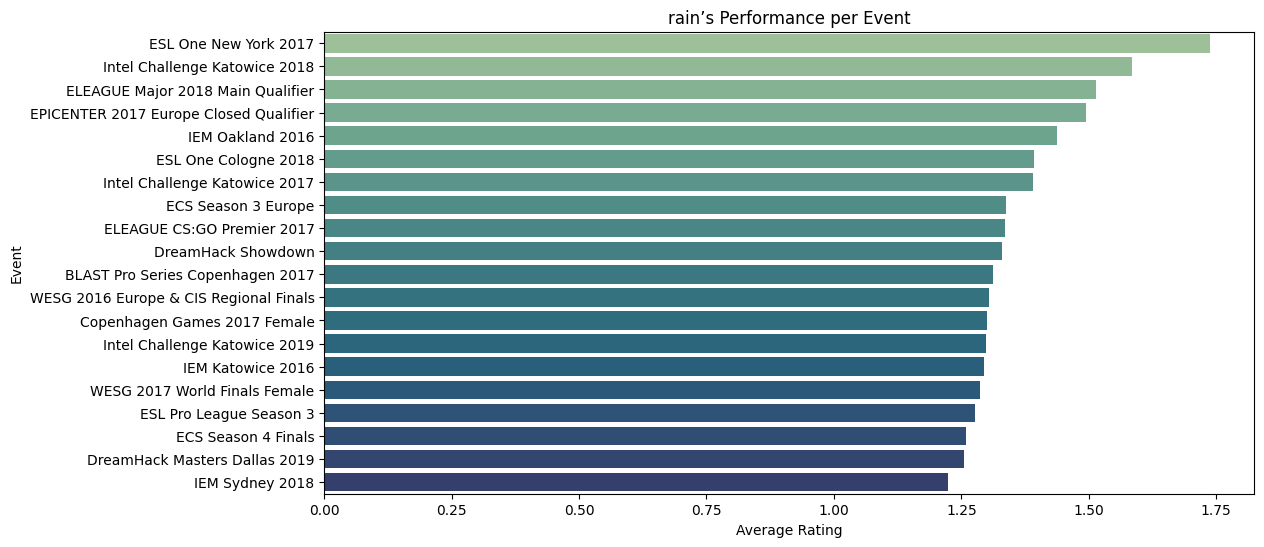

In [ ]:
query = '''
SELECT event_name, AVG(rating) AS avg_rating
FROM players
WHERE player_name = 'rain'
GROUP BY event_name
HAVING COUNT(*) > 3
ORDER BY avg_rating DESC
limit 20
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='avg_rating', y='event_name', palette='crest')
plt.title('rain’s Performance per Event')
plt.xlabel('Average Rating')
plt.ylabel('Event')
plt.show()


In [ ]:
query = '''
SELECT AVG(kills_ct) AS avg_ct_kills, AVG(kills_t) AS avg_t_kills
FROM players
WHERE player_name = 'rain'
'''
df = pd.read_sql(query, conn)
print(df)


   avg_ct_kills  avg_t_kills
0     14.973899    13.078303


In [ ]:
query = '''
SELECT SUM(fkdiff) AS total_fkdiff, SUM(kills - deaths) AS clutch_kddiff
FROM players p
JOIN results r ON p.match_id = r.match_id
WHERE p.player_name = 'rain' AND p.team != r.match_winner
'''
df = pd.read_sql(query, conn)
print(df)


   total_fkdiff  clutch_kddiff
0            19           1310


In [ ]:
query = '''
SELECT SUM(fkdiff) AS total_fkdiff, SUM(flash_assists) AS total_flash_assists
FROM players
WHERE player_name = 'rain' AND team = 'FaZe'
'''
df = pd.read_sql(query, conn)
print(df)


   total_fkdiff  total_flash_assists
0            99                453.0


In [ ]:
query = '''
SELECT AVG(kills_ct) AS avg_ct_kills, AVG(kills_t) AS avg_t_kills
FROM players
WHERE player_name = 'rain' AND team = 'FaZe'
'''
df = pd.read_sql(query, conn)
print(df)


   avg_ct_kills  avg_t_kills
0     14.966555    13.051839


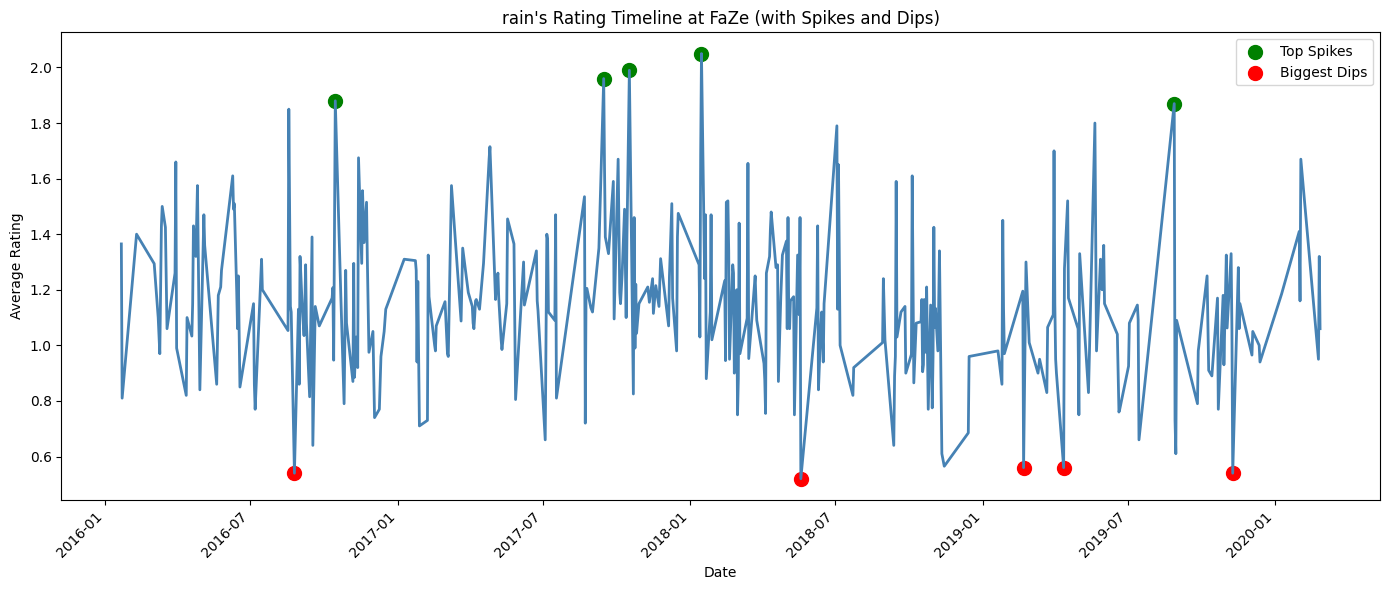

In [ ]:
query = '''
SELECT date, AVG(rating) AS avg_rating
FROM players
WHERE player_name = 'rain' AND team = 'FaZe'
GROUP BY date
ORDER BY date
'''
df = pd.read_sql(query, conn)
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='avg_rating', color='steelblue', linewidth=2)

# Highlight spike points (top 5)
top_spikes = df.sort_values(by='avg_rating', ascending=False).head(5)
plt.scatter(top_spikes['date'], top_spikes['avg_rating'], color='green', s=100, label='Top Spikes')

# Highlight dip points (bottom 5)
bottom_dips = df.sort_values(by='avg_rating', ascending=True).head(5)
plt.scatter(bottom_dips['date'], bottom_dips['avg_rating'], color='red', s=100, label='Biggest Dips')

plt.title("rain's Rating Timeline at FaZe (with Spikes and Dips)")
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


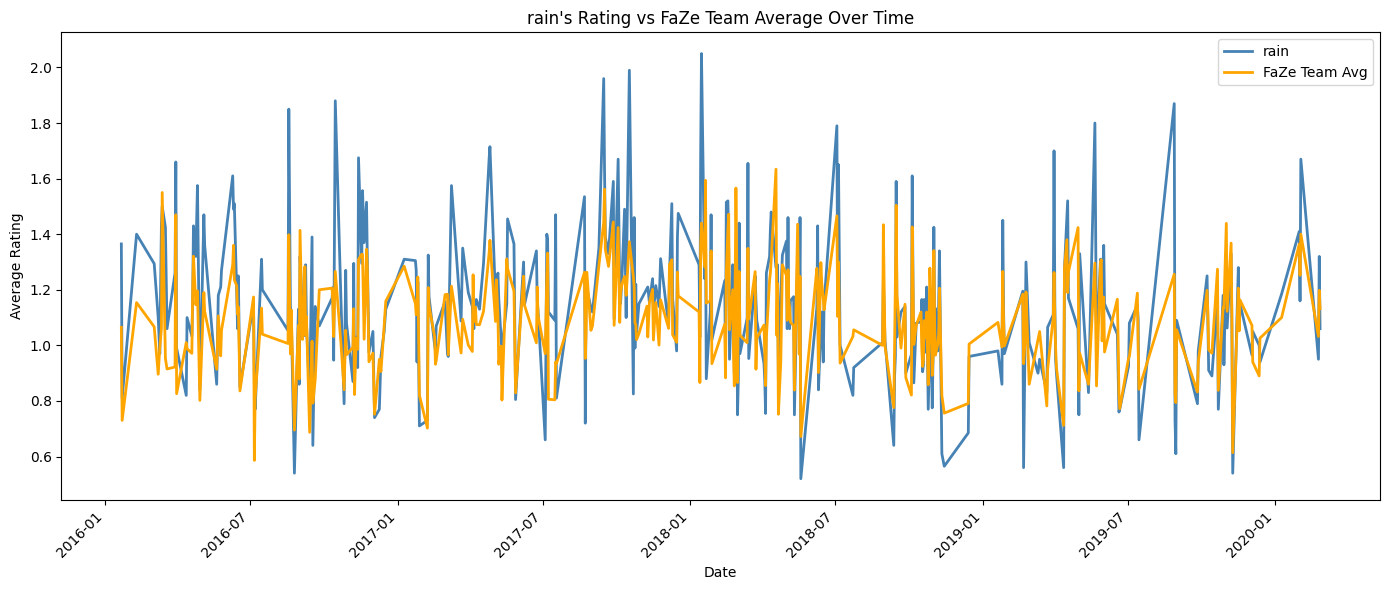

In [ ]:
query = '''
SELECT date,
       AVG(CASE WHEN player_name = 'rain' THEN rating END) AS rain_rating,
       AVG(rating) AS team_avg_rating
FROM players
WHERE team = 'FaZe'
GROUP BY date
ORDER BY date
'''
df = pd.read_sql(query, conn)
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14,6))

sns.lineplot(data=df, x='date', y='rain_rating', label='rain', color='steelblue', linewidth=2)
sns.lineplot(data=df, x='date', y='team_avg_rating', label='FaZe Team Avg', color='orange', linewidth=2)

plt.title("rain's Rating vs FaZe Team Average Over Time")
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

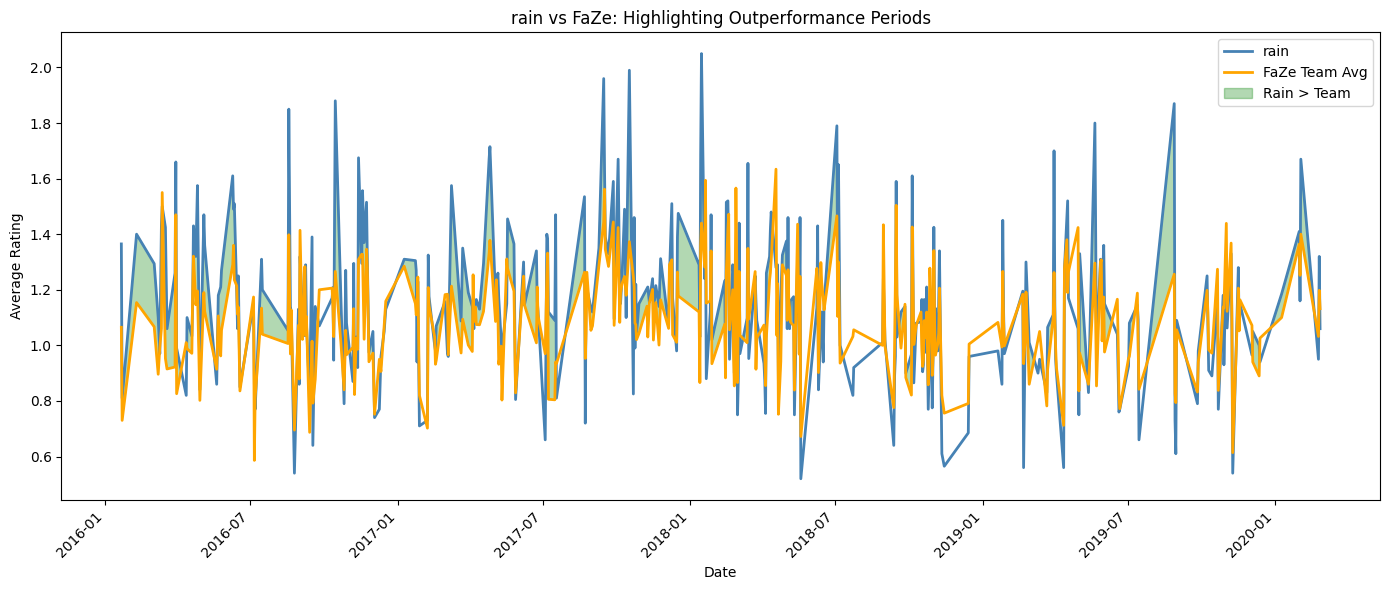

In [ ]:
df['rain_beats_team'] = df['rain_rating'] > df['team_avg_rating']

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='rain_rating', label='rain', color='steelblue', linewidth=2)
sns.lineplot(data=df, x='date', y='team_avg_rating', label='FaZe Team Avg', color='orange', linewidth=2)

# Shade outperforming areas
plt.fill_between(df['date'], df['rain_rating'], df['team_avg_rating'],
                 where=df['rain_beats_team'],
                 interpolate=True, color='green', alpha=0.3, label='Rain > Team')

plt.title("rain vs FaZe: Highlighting Outperformance Periods")
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


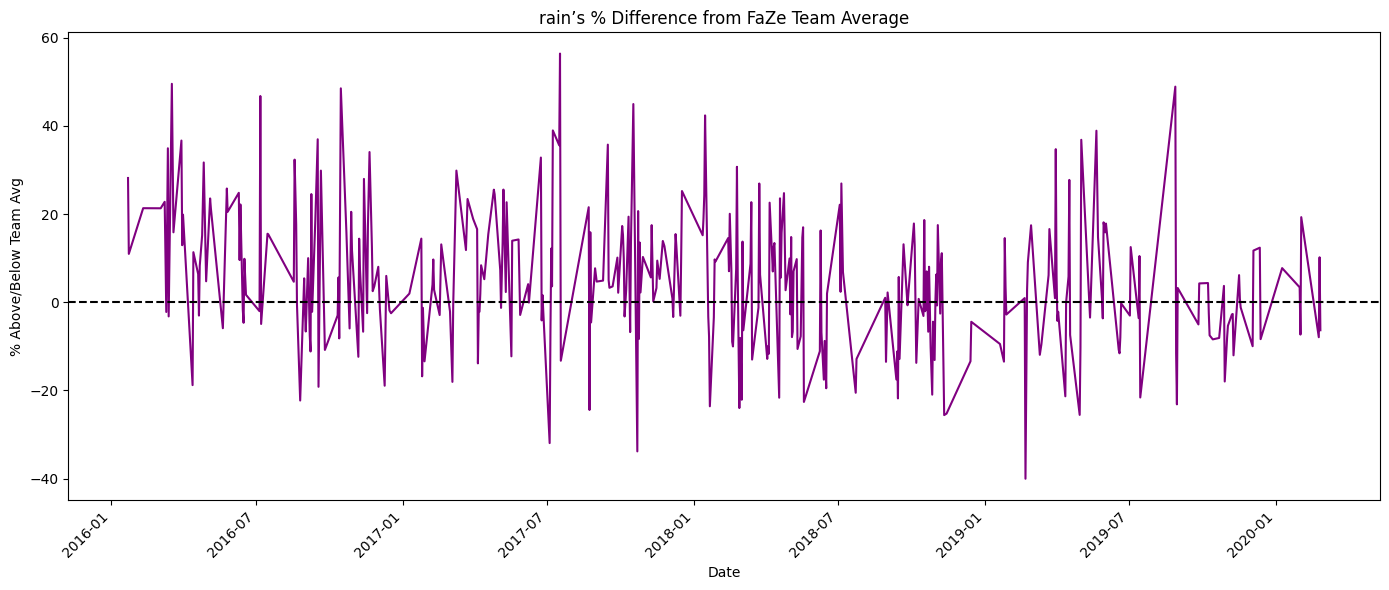

In [ ]:
df['diff_percent'] = ((df['rain_rating'] - df['team_avg_rating']) / df['team_avg_rating']) * 100

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='diff_percent', color='purple')
plt.axhline(0, color='black', linestyle='--')

plt.title("rain’s % Difference from FaZe Team Average")
plt.xlabel('Date')
plt.ylabel('% Above/Below Team Avg')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
query = '''
SELECT AVG(rating) AS avg_team_rating, AVG(adr) AS avg_team_adr,
       SUM(kills) AS total_team_kills, SUM(deaths) AS total_team_deaths
FROM players
WHERE team = 'FaZe'
'''
df = pd.read_sql(query, conn)
print(df)


   avg_team_rating  avg_team_adr  total_team_kills  total_team_deaths
0         1.100514     76.037171             80362              76159


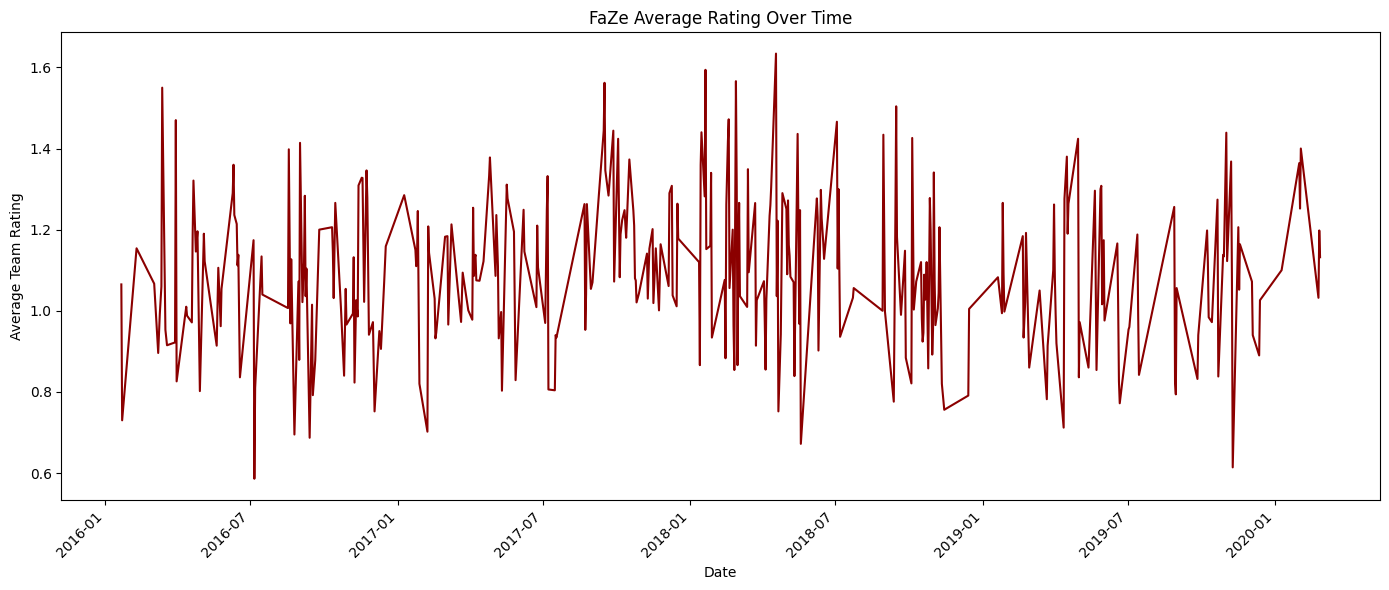

In [ ]:
query = '''
SELECT date, AVG(rating) AS avg_team_rating
FROM players
WHERE team = 'FaZe'
GROUP BY date
ORDER BY date
'''
df = pd.read_sql(query, conn)
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='avg_team_rating', color='darkred')
plt.title("FaZe Average Rating Over Time")
plt.xlabel('Date')
plt.ylabel('Average Team Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-176-c074419ad792>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_rating', y='map_name', palette='crest')


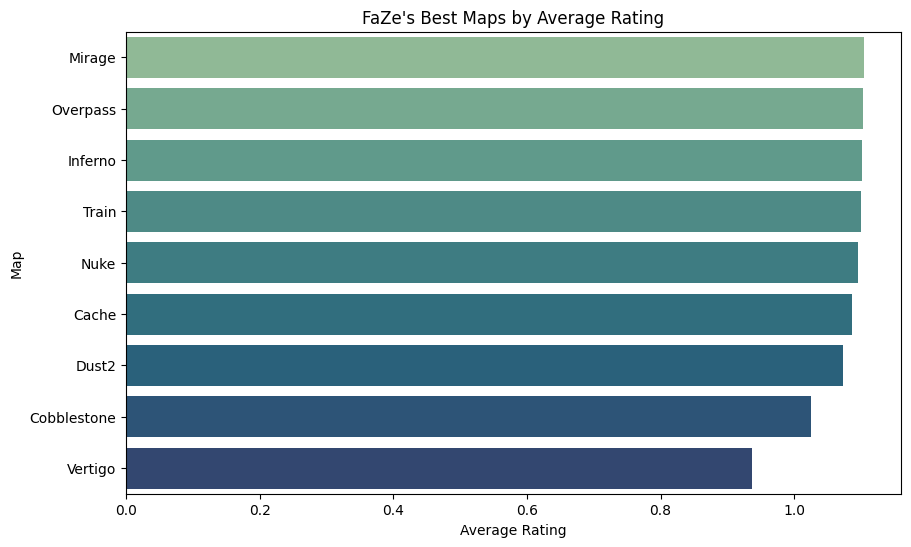

In [ ]:
query = '''
SELECT r._map AS map_name, AVG(p.rating) AS avg_rating
FROM players p
JOIN results r ON p.match_id = r.match_id
WHERE p.team = 'FaZe'
GROUP BY r._map
ORDER BY avg_rating DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='avg_rating', y='map_name', palette='crest')
plt.title("FaZe's Best Maps by Average Rating")
plt.xlabel('Average Rating')
plt.ylabel('Map')
plt.show()


<ipython-input-178-9c5006e8260c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_event_rating', y='event_name', palette='viridis')


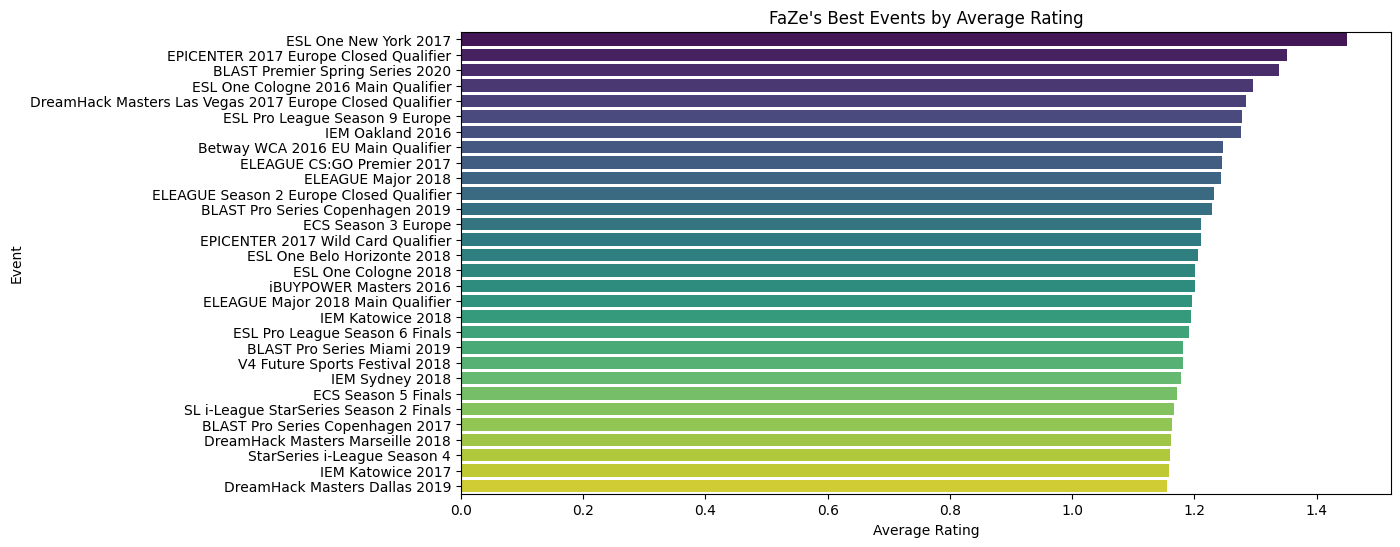

In [ ]:
query = '''
SELECT p.event_name, AVG(p.rating) AS avg_event_rating
FROM players p
WHERE p.team = 'FaZe'
GROUP BY p.event_name
HAVING COUNT(*) > 3
ORDER BY avg_event_rating DESC
limit 30
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='avg_event_rating', y='event_name', palette='viridis')
plt.title("FaZe's Best Events by Average Rating")
plt.xlabel('Average Rating')
plt.ylabel('Event')
plt.show()


<ipython-input-179-51e96f4fcfee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_player_rating', y='player_name', palette='magma')


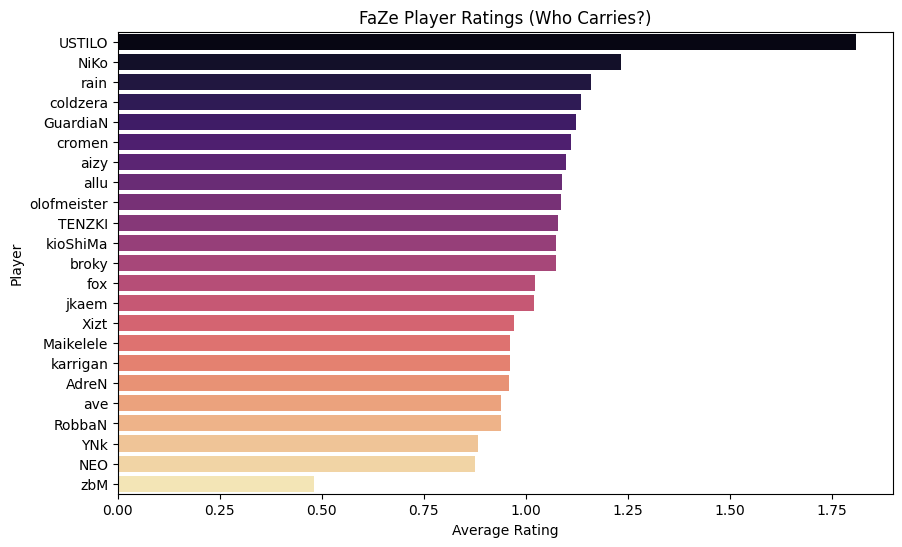

In [ ]:
query = '''
SELECT player_name, AVG(rating) AS avg_player_rating, SUM(kills) AS total_kills
FROM players
WHERE team = 'FaZe'
GROUP BY player_name
ORDER BY avg_player_rating DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='avg_player_rating', y='player_name', palette='magma')
plt.title('FaZe Player Ratings (Who Carries?)')
plt.xlabel('Average Rating')
plt.ylabel('Player')
plt.show()


<ipython-input-180-c8be9d9ba7e4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='avg_player_rating', y='player_name', palette='magma')


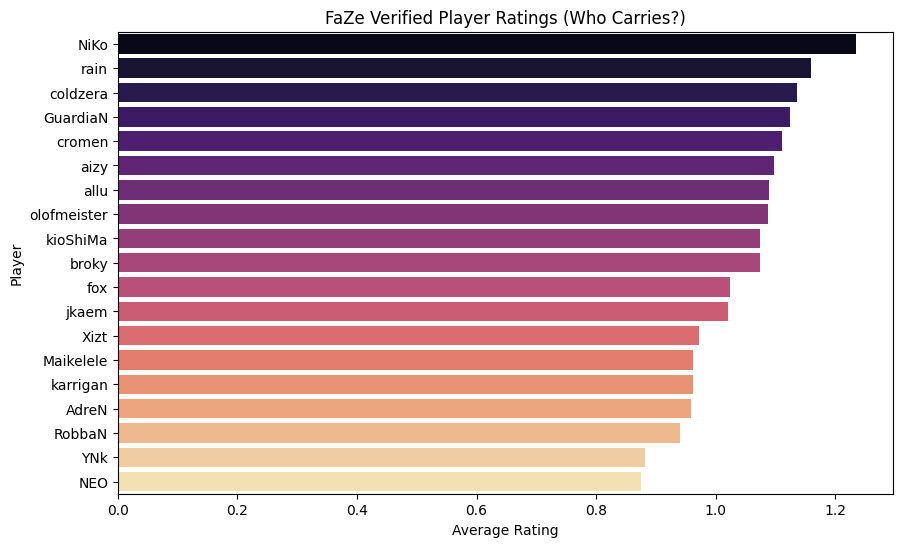

In [ ]:
faze_known_players = [
    'rain', 'NiKo', 'coldzera', 'GuardiaN', 'cromen', 'aizy', 'allu',
    'olofmeister', 'TENCEKI', 'kioShiMa', 'broky', 'fox', 'jkaem',
    'Xizt', 'Maikelele', 'karrigan', 'AdreN', 'RobbaN', 'NEO', 'YNk'
]

query = f'''
SELECT player_name, AVG(rating) AS avg_player_rating
FROM players
WHERE team = 'FaZe' AND player_name IN {tuple(faze_known_players)}
GROUP BY player_name
ORDER BY avg_player_rating DESC
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='avg_player_rating', y='player_name', palette='magma')
plt.title('FaZe Verified Player Ratings (Who Carries?)')
plt.xlabel('Average Rating')
plt.ylabel('Player')
plt.show()


<ipython-input-182-e36bd7a94574>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='event_type', y='avg_rating', palette='rocket')


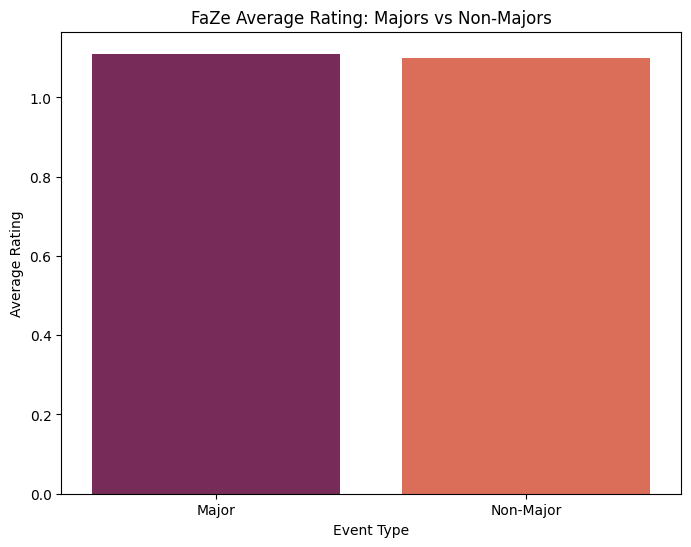

In [ ]:
query = '''
SELECT CASE WHEN p.event_name LIKE '%Major%' THEN 'Major' ELSE 'Non-Major' END AS event_type,
       AVG(p.rating) AS avg_rating
FROM players p
WHERE p.team = 'FaZe'
GROUP BY event_type
'''
df = pd.read_sql(query, conn)

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='event_type', y='avg_rating', palette='rocket')
plt.title('FaZe Average Rating: Majors vs Non-Majors')
plt.xlabel('Event Type')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
query = '''
SELECT p1.player_name AS player_1, p2.player_name AS player_2,
       COUNT(*) AS matches_together, AVG((p1.rating + p2.rating) / 2) AS avg_pair_rating
FROM players p1
JOIN players p2 ON p1.match_id = p2.match_id
WHERE p1.team = 'FaZe' AND p2.team = 'FaZe' AND p1.player_name < p2.player_name
GROUP BY p1.player_name, p2.player_name
HAVING matches_together > 10
ORDER BY avg_pair_rating DESC
LIMIT 10
'''
df = pd.read_sql(query, conn)
print(df[['player_1', 'player_2', 'matches_together', 'avg_pair_rating']])


   player_1     player_2  matches_together  avg_pair_rating
0      NiKo       cromen                12         1.256667
1      NiKo         rain               436         1.195470
2  GuardiaN         NiKo               322         1.180186
3  GuardiaN       cromen                12         1.173750
4      NiKo         allu                76         1.170789
5      NiKo     kioShiMa                74         1.166419
6      NiKo     coldzera                36         1.166250
7    cromen         rain                12         1.155000
8      NiKo  olofmeister               306         1.151144
9  GuardiaN         rain               325         1.137446


In [ ]:
query = '''
SELECT AVG(kills_ct) AS avg_ct_kills, AVG(kills_t) AS avg_t_kills
FROM players
WHERE team = 'FaZe'
'''
df = pd.read_sql(query, conn)
print(df)


   avg_ct_kills  avg_t_kills
0     14.249832    12.559691


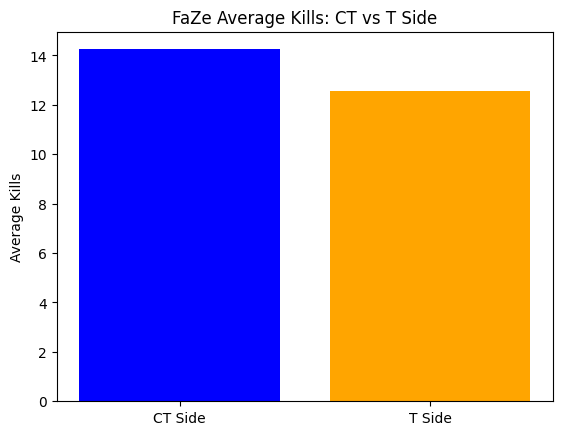

In [ ]:
plt.bar(['CT Side', 'T Side'], [df['avg_ct_kills'][0], df['avg_t_kills'][0]], color=['blue', 'orange'])
plt.title('FaZe Average Kills: CT vs T Side')
plt.ylabel('Average Kills')
plt.show()
